# Exploring travel trends on the Transport for London network 🚉

Welcome to my analysis of the average monthly temperatures on Transport for London's (TfL) tube & train network! 
This project aims to examine the patterns of travel on the Transport for London (TfL) network using [TfL open access data](http://crowding.data.tfl.gov.uk/) from 2007 to 2021. 

We'll be taking a closer look at how commuter figures across the TfL network changes over the years and what factors may be behind these trends 📈. By examining these trends, we can get an idea of which areas are under-served and make further inferences.

With that said, let's get started!

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium
import hvplot.pandas
from shapely.geometry import Point
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from shapely.geometry import Point
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

## Preprocessing 🛠️

In this first section we will work on preprocessing. This involves cleaning ✨, transforming 🔀, and organizing 📂 our data to make it more suitable for analysis.

Don't worry, if you're not into that kind of stuff, no worries! You can collapse this section with a click of a button 🤏 and move on to the next. But if you stick around, you might learn some cool things!

So if you're ready for some data magic 🔮, feel free to expand this section and learn more about the specifics of preprocessing in my project!

### Loading TFL Station ridership data

#### Loading in 2007 to 2016 Entry / Exit data

In [111]:
file_name='data/TFL Station Counts/Annual_Counts/multi-year-station-entry-and-exit-figures.xlsx'

sheet07='2007 Entry & Exit'
df2007=pd.read_excel(io=file_name, sheet_name=sheet07, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])
sheet08='2008 Entry & Exit'
df2008=pd.read_excel(io=file_name, sheet_name=sheet08, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet09='2009 Entry & Exit'
df2009=pd.read_excel(io=file_name, sheet_name=sheet09, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet10='2010 Entry & Exit'
df2010=pd.read_excel(io=file_name, sheet_name=sheet10, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet11='2011 Entry & Exit'
df2011=pd.read_excel(io=file_name, sheet_name=sheet11, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet12='2012 Entry & Exit'
df2012=pd.read_excel(io=file_name, sheet_name=sheet12, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet13='2013 Entry & Exit'
df2013=pd.read_excel(io=file_name, sheet_name=sheet13, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])
sheet14='2014 Entry & Exit'
df2014=pd.read_excel(io=file_name, sheet_name=sheet14, skiprows=6).drop(columns=[
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet15='2015 Entry & Exit'
df2015=pd.read_excel(io=file_name, sheet_name=sheet15, skiprows=6).drop(columns=[  
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])
sheet16='2016 Entry & Exit'
df2016=pd.read_excel(io=file_name, sheet_name=sheet16, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])
df2011.sample(5)

nlc                              Station Note    million
59   558  Dollis Hill                                3.076494
172  672  Parsons Green                              5.944855
122  618  Kensington (Olympia)                       1.737833
82   581  Fulham Broadway                            9.562872
212  697  St. Paul's                                17.084479

#### Loading in 2017 Entry / Exit data

In [112]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2017 
file_name =  'data/TFL Station Counts/Annual_Counts/AnnualisedEntryExit_2017.xlsx'
sheet =  'Annualised'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2017 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2017=df2017.drop(columns=['entries', 
                            'entries.1', 
                            'entries.2',
                            'Unnamed: 7',
                            'exits',
                            'exits.1',
                            'exits.2',
                            'Unnamed: 11']).round()
df2017.sample(5)

Mode  NLC   ASC            Station              Coverage  Source  \
95    LU  773  HMSu  Hammersmith (H&C)  Station entry / exit  Relate   
58    LU  557  DEBu             Debden  Station entry / exit  Relate   
45    LU  544  CHGu           Chigwell  Station entry / exit  Relate   
410  DLR  859  PMLd  Pudding Mill Lane  Station entry / exit     APC   
404  DLR  862  LIMd      Limehouse DLR  Station entry / exit     APC   

          en/ex  
95   10318281.0  
58    2356317.0  
45     477501.0  
410    595193.0  
404   9390199.0

In [113]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2017 
file_name =  'data/TFL Station Counts/Hourly_Counts/ByQhrEntryExit_2017.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2017hr = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2017hr=df2017hr.iloc[:,0:15]
df2017hr.sample(5)

Mode  NLC   ASC               Station                  Coverage  year  \
576    LU  539  CLFu    Chalfont & Latimer      Station entry / exit  2017   
1774   LO  618  OLYu  Kensington (Olympia)      Station entry / exit  2017   
578    LU  541  CYLu         Chancery Lane      Station entry / exit  2017   
238    LU  777  VUXu           Vauxhall LU      Station entry / exit  2017   
2507  DLR  513  BNKu     Bank and Monument  DLR boarding / alighting  2017   

      day  dir  Total  Early       AM Peak  Inter Peak  PM Peak  Evening     \
576   SAT   IN   1286          19      218         652      235         114   
1774  MTF  OUT   6121          97     2962        2027      424         144   
578   SAT   IN   8066         124      341        3223     2157        1094   
238   MTF   IN  50772        1587    16279       12144    14905        4277   
2507  SUN  OUT  22497          16     2465       11558     5055        2552   

      Late        
576           48  
1774         467  
578         1127  
238         1580  
2507         851

#### Loading in 2018 Entry / Exit data


In [114]:
#Loading in TFL Station Exit & Entry Spreadsheet for 2017 
file_name =  'data/TFL Station Counts/Annual_Counts/AnnualisedEntryExit_2018.xlsx'
sheet =  'Annualised'
#Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2018 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2018=df2018.drop(columns=['entries', 
                            'entries.1', 
                            'entries.2',
                            'entries.3',
                            'exits',
                            'exits.1',
                            'exits.2',
                            'exits.3']).round()
df2018.sample(5)

Mode   NLC   ASC              Station                 Coverage  \
375   LO  6956  WHLr      White Hart Lane     Station entry / exit   
253   LU   759  WHRu          West Harrow     Station entry / exit   
148   LU   646  MPKu            Moor Park     Station entry / exit   
364   LO   742  WALu  Walthamstow Central  LO boarding / alighting   
288   LO  5301  CLPr  Clapham High Street     Station entry / exit   

           Source      en/ex  
375      Gateline  2358599.0  
253      Gateline  1596411.0  
148      Gateline   913450.0  
364  Manual Count  5753915.0  
288        Scaled  2192193.0

In [115]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2018 
file_name =  'data/TFL Station Counts/Hourly_Counts/ByQhrEntryExit_2018.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2018hr = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2018hr=df2018hr.iloc[:,0:15]
df2018hr.sample(5)

Mode   NLC   ASC          Station              Coverage  year  day  dir  \
2829   LO  6962  CBHr  Cambridge Heath  Station entry / exit  2018  SUN   IN   
2254   LO  6954  WSTr      Wood Street  Station entry / exit  2018  MTT   IN   
663    LU   623   KPK     Kilburn Park  Station entry / exit  2018  FRI   IN   
1655   LU   546   CWD      Chorleywood  Station entry / exit  2018  SUN   IN   
2045   LU   669   OXC    Oxford Circus  Station entry / exit  2018  SUN  OUT   

      Total  Early       AM Peak  Inter Peak  PM Peak  Evening     Late        
2829    907           0       37         458      238         118          56  
2254   3172         335     1468         710      507         122          30  
663    5758         208     1810        1809     1163         561         207  
1655    934           6      108         593      165          43          19  
2045  67672         514     5234       44476    13156        3547         745

#### Loading in 2019 Entry / Exit data

In [116]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2017 
file_name =  'data/TFL Station Counts/Annual_Counts/AnnualisedEntryExit_2019.xlsx'
sheet =  'Annualised'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2019 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2019=df2019.drop(columns=['entries', 
                            'entries.1', 
                            'entries.2',
                            'entries.3',
                            'exits',
                            'exits.1',
                            'exits.2',
                            'exits.3']).round()
df2019.sample(5)

Mode   NLC   ASC            Station              Coverage    Source  \
312   LO  1398  HTEr          Hatch End  Station entry / exit  Gateline   
193   LU   693  RUMu      Ruislip Manor  Station entry / exit  Gateline   
413  DLR   860  SHAd       Shadwell DLR  Station entry / exit       APC   
407  DLR   538  PDKd       Pontoon Dock  Station entry / exit       APC   
164   LU   663  NHGu  Notting Hill Gate  Station entry / exit  Gateline   

          en/ex  
312    726221.0  
193   1893831.0  
413   8862262.0  
407   3175895.0  
164  15070782.0

In [117]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2019 
file_name =  'data/TFL Station Counts/Hourly_Counts/ByQhrEntryExit_2019.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2019hr = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2019hr=df2019hr.iloc[:,0:15]
df2019hr.sample(5)

Mode   NLC   ASC                      Station                 Coverage  \
3033   LO  5411  WCYr              West Croydon NR  LO boarding / alighting   
3082  DLR   559  WSId              West Silvertown     Station entry / exit   
814    LU   512  BALu                    Balham LU     Station entry / exit   
1006   LU   708  SKNu             South Kensington     Station entry / exit   
3393  DLR   504  STId  Stratford International DLR     Station entry / exit   

      year  day  dir  Total  Early       AM Peak  Inter Peak  PM Peak  \
3033  2019  SUN  OUT   2646           0      244        1037      730   
3082  2019  MTT   IN   2931         212     1003         734      765   
814   2019  FRI  OUT  21584         233     2379        3866     7328   
1006  2019  FRI  OUT  56183         865    14509       23261    10513   
3393  2019  SUN  OUT   3428           9      305        1455      786   

      Evening     Late        
3033         436         199  
3082         155          62  
814         4316        3462  
1006        4930        2105  
3393         601         272

#### Loading in 2020 Entry / Exit data

In [118]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2020 
file_name =  'data/TFL Station Counts/Annual_Counts/AC2020_AnnualisedEntryExit.xlsx'
sheet =  'Annualised'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2020 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2020=df2020.drop(columns=['Entries', 
                            'Entries.1', 
                            'Entries.2', 
                            'Entries.3', 
                            'Exits', 
                            'Exits.1', 
                            'Exits.2', 
                            'Exits.3']).round()
df2020.sample(5)

Mode   NLC   ASC           Station              Coverage    Source  \
46    LU   642  MLEu          Mile End  Station entry / exit  Gateline   
216   LU   760  WKNu   West Kensington  Station entry / exit  Gateline   
315   LU   610  HCHu        Hornchurch  Station entry / exit  Gateline   
311   LO  1022  HGGr        Haggerston  Station entry / exit  Gateline   
1     LU   635  LONu  London Bridge LU  Station entry / exit  Gateline   

          En/Ex  
46    6787729.0  
216   2096566.0  
315   1247419.0  
311   1260312.0  
1    24721911.0

In [119]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2020 
file_name =  'data/TFL Station Counts/Hourly_Counts/AC2020_ByQhrEntryExit.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2020hr = pd.read_excel(io=file_name, 
                         sheet_name=sheet,
                         skiprows=6).round()
convert_dict = {'Total': np.int32, 
                'Early     ': np.int32, 
                'AM Peak': np.int32, 
                'Inter Peak': np.int32, 
                'PM Peak': np.int32, 
                'Evening   ': np.int32, 
                'Late      ': np.int32}
df2020hr = df2020hr.astype(convert_dict)
df2020hr=df2020hr.iloc[:,0:15]
df2020hr.head(5)

Mode  NLC   ASC       Station              Coverage  year  day  dir  Total  \
0   LU  500  ACTu    Acton Town  Station entry / exit  2020  MTT   IN   3702   
1   LU  502  ALDu       Aldgate  Station entry / exit  2020  MTT   IN   2489   
2   LU  503  ALEu  Aldgate East  Station entry / exit  2020  MTT   IN   3198   
3   LU  505  ALPu      Alperton  Station entry / exit  2020  MTT   IN   2073   
4   LU  506  AMEu      Amersham  Station entry / exit  2020  MTT   IN    980   

   Early       AM Peak  Inter Peak  PM Peak  Evening     Late        
0         288     1101        1186      824         213          89  
1         173      520         622      920         208          46  
2         103      473        1064     1126         333          99  
3         360      668         506      409          99          31  
4         148      425         257      124          21           6

#### Loading in 2021 Entry / Exit data

In [120]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2021 
file_name =  'data/TFL Station Counts/Annual_Counts/AC2021_AnnualisedEntryExit.xlsx'
sheet =  'Annualised'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2021 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2021=df2021.drop(columns=['Entries', 
                            'Entries.1', 
                            'Entries.2', 
                            'Entries.3', 
                            'Exits', 
                            'Exits.1', 
                            'Exits.2', 
                            'Exits.3']).round()
df2021.sample(5)

Mode   NLC   ASC           Station                 Coverage  \
192   LU   692  RUGu   Ruislip Gardens     Station entry / exit   
301   LO  1444  EUSr         Euston NR  LO boarding / alighting   
187   LU   686  RMDu          Richmond  LU boarding / alighting   
336   LO  5376  NWDr  Norwood Junction  LO boarding / alighting   
397  DLR   883  EAId        East India     Station entry / exit   

            Source      En/Ex  
192       Gateline   476607.0  
301  Scale_earlier  2116277.0  
187         Scaled  2196602.0  
336         Scaled   886919.0  
397            APC  2333112.0

In [121]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2021 
file_name =  'data/TFL Station Counts/Hourly_Counts/AC2021_ByQhrEntryExit.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2021hr = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6).round()
convert_dict = {'Total': np.int32, 
                'Early     ': np.int32, 
                'AM Peak': np.int32, 
                'Inter Peak': np.int32, 
                'PM Peak': np.int32, 
                'Evening   ': np.int32, 
                'Late      ': np.int32}
df2021hr = df2021hr.astype(convert_dict)
df2021hr=df2021hr.iloc[:,0:15]
df2021hr.head(5)

Mode  NLC   ASC       Station              Coverage  year  day  dir  Total  \
0   LU  500  ACTu    Acton Town  Station entry / exit  2021  MTT   IN   6851   
1   LU  502  ALDu       Aldgate  Station entry / exit  2021  MTT   IN   8038   
2   LU  503  ALEu  Aldgate East  Station entry / exit  2021  MTT   IN  12751   
3   LU  505  ALPu      Alperton  Station entry / exit  2021  MTT   IN   3109   
4   LU  506  AMEu      Amersham  Station entry / exit  2021  MTT   IN   2384   

   Early       AM Peak  Inter Peak  PM Peak  Evening     Late        
0         415     2195        2017     1617         439         169  
1         213     1235        1910     3310        1044         326  
2         202     1758        3842     4344        1851         753  
3         367     1067         823      606         199          47  
4         379     1050         574      311          51          19

###### In the Hourly DFs loaded in the categories are grouped into Early, AM Peak, Inter Peak,	PM Peak,	Evening, &	Late. These categories are specified as follows: 
* 🌅 Early - 5:00 to 7:00
* ☀️ AM Peak - 7:00 to 10:00
* 🌞 Inter Peak - 10:00 to 16:00
* 🌇 PM Peak - 16:00 to 19:00
* 🌙 Evening - 19:00 to 22:00
* 🌃 Late - 22:00 to 05:00

In [122]:
# The DataDrames contain the Stations and their associated TFL mode. 
# Some stations contain multiple train modes however, so only 'unique' instances are called

print('2007', '-', '[LU]',
      df2007['Station'].nunique(),'stations') 

print('2008', '-', '[LU]', 
      df2008['Station'].nunique(),'stations') # East London Line decomissioned and joins London Overground

print('2009', '-', '[LU]',
      df2009['Station'].nunique(),'stations')

print('2010', '-', '[LU]',
      df2010['Station'].nunique(),'stations')

print('2011', '-', '[LU]',
      df2011['Station'].nunique(),'stations')

print('2012', '-', '[LU]',
      df2012['Station'].nunique(),'stations')

print('2013', '-', '[LU]',
      df2013['Station'].nunique(),'stations')

print('2014', '-', '[LU]',
      df2014['Station'].nunique(),'stations')

print('2015', '-', '[LU]',
      df2015['Station'].nunique(),'stations')

print('2016', '-', '[LU]',
      df2016['Station'].nunique(),'stations')

print('2017', '-',
      df2017['Mode'].unique(), 
      df2017['Station'].nunique(),'stations') # Data provided in prior DFs is only for London Underground
print('2018', '-',
      df2018['Mode'].unique(), 
      df2018['Station'].nunique(),'stations') # Stations opened on the TFLRail West route
print('2019', '-',
      df2019['Mode'].unique(), 
      df2019['Station'].nunique(),'stations') 
print('2020', '-',
      df2020['Mode'].unique(), 
      df2020['Station'].nunique(),'stations') # More Stations opened on the TFLRail West route
                                              # TFLRail is rebranded as the Elizabeth Line(EZL) upon completion
print('2021', '-',
      df2021['Mode'].unique(), 
      df2021['Station'].nunique(),'stations') # Nine Elms and Battersea Power Station added to the Northern Line

2007 - [LU] 273 stations
2008 - [LU] 268 stations
2009 - [LU] 268 stations
2010 - [LU] 268 stations
2011 - [LU] 268 stations
2012 - [LU] 268 stations
2013 - [LU] 268 stations
2014 - [LU] 268 stations
2015 - [LU] 268 stations
2016 - [LU] 268 stations
2017 - ['LU' 'LO' 'DLR' 'TfLRail'] 408 stations
2018 - ['LU' 'LO' 'DLR' 'TfLRail'] 416 stations
2019 - ['LU' 'LO' 'DLR' 'TfLRail'] 416 stations
2020 - ['LU' 'DLR' 'LO' 'EZL'] 426 stations
2021 - ['LU' 'LO' 'DLR' 'EZL'] 428 stations


In [123]:
pd.set_option('display.max_columns', None)

In [124]:
# For some reason, some of the column names have white space, as shown below. 
print(df2017hr.keys())
print(df2018hr.keys())
print(df2019hr.keys())
print(df2020hr.keys())
print(df2021hr.keys())

Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')


In [125]:
# To correct this, the columns are stripped of whitespace
df2017hr.columns=df2017hr.keys().str.strip()
df2018hr.columns=df2018hr.keys().str.strip()
df2019hr.columns=df2019hr.keys().str.strip()
df2020hr.columns=df2020hr.keys().str.strip()
df2021hr.columns=df2021hr.keys().str.strip()
print(df2017hr.keys())
print(df2018hr.keys())
print(df2019hr.keys())
print(df2020hr.keys())
print(df2021hr.keys())

Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')


### Slicing the data by Days of the week 

#### Slicing 2017 Entry / Exit data

In [126]:
df2017hr=df2017hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2017hr[df2017hr['day']=='MTF'].sum(numeric_only=True)[3:].sum()
print(df2017hr[df2017hr['day']=='MTF'].sum(numeric_only=True)[2:])

Total         11601418
Early           410606
AM Peak        3050039
Inter Peak     2880265
PM Peak        3183198
Evening        1439332
Late            637978
dtype: int64


#### Slicing 2018 Entry / Exit data

In [127]:
df2018hr=df2018hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2018hr[df2018hr['day']=='MTT'].sum(numeric_only=True)[3:].sum()
print(df2018hr[df2018hr['day']=='MTT'].sum(numeric_only=True)[2:])

Total         11602754
Early           426922
AM Peak        3049475
Inter Peak     2920222
PM Peak        3194781
Evening        1430876
Late            580478
dtype: int64


#### Slicing 2019 Entry / Exit data

In [128]:
df2019hr=df2019hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2019hr[df2019hr['day']=='MTT'].sum(numeric_only=True)[3:].sum()
print(df2019hr[df2019hr['day']=='MTT'].sum(numeric_only=True)[2:])

Total         11777884
Early           422622
AM Peak        3100335
Inter Peak     2971552
PM Peak        3254342
Evening        1447731
Late            581302
dtype: int64


#### Slicing 2020 Entry / Exit data

In [129]:
df2020hr=df2020hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2020hr[df2020hr['day']=='MTT'].sum(numeric_only=True)[3:].sum()
print(df2020hr[df2020hr['day']=='MTT'].sum(numeric_only=True)[2:])

Total         2999545
Early          217860
AM Peak        779180
Inter Peak     829986
PM Peak        834653
Evening        266806
Late            71054
dtype: int64


#### Slicing 2021 Entry / Exit data

In [130]:
df2021hr=df2021hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2021hr[df2021hr['day']=='MTT'].sum(numeric_only=True)[3:].sum()
print(df2021hr[df2021hr['day']=='MTT'].sum(numeric_only=True)[2:])

Total         7349812
Early          301384
AM Peak       1744411
Inter Peak    1979360
PM Peak       2011992
Evening        893644
Late           419004
dtype: int64


In [131]:
df2017hr.head()

year  NLC  day     Station  dir  Total  Early  AM Peak  Inter Peak  \
0  2017  500  MTF  Acton Town   IN   9531    608     3287        2705   
1  2017  500  MTF  Acton Town  OUT   9382    265     1979        1762   
2  2017  500  SAT  Acton Town   IN   6716    256     1087        2978   
3  2017  500  SAT  Acton Town  OUT   6617    147      617        1901   
4  2017  500  SUN  Acton Town   IN   4744    155      747        2438   

   PM Peak  Evening  Late  
0     2029      655   247  
1     2664     1689  1023  
2     1281      713   401  
3     1465     1226  1261  
4      821      442   141

In [132]:
dfs = [df2017hr, df2018hr, df2019hr, df2020hr, df2021hr]

# concatenating
df_mergedhr = pd.concat(dfs, axis=0, ignore_index=True)

# check the resulting data frame
df_mergedhr.sample(5)

year   NLC  day            Station  dir  Total  Early  AM Peak  \
3243  2018   599  MTT          Wood Lane  OUT   7853    181     1952   
8330  2019  1404  MTT      Acton Central   IN   3091    219     1146   
9211  2020   513  MTT  Bank and Monument  OUT  18894   1747     7335   
2200  2017  6879  SUN        Harold Wood   IN    798     15      127   
5272  2018  5376  FRI   Norwood Junction   IN   2640    286      851   

      Inter Peak  PM Peak  Evening  Late  
3243        2360     2371      795   194  
8330         721      725      221    59  
9211        5194     3153     1044   421  
2200         436      133       54    33  
5272         572      509      365    57

### Grouping DFs and Standardizing formats

As the datasets have had their formats altered over the years, it is necessary for some formatting to ensure uniformity in our Dataframe.

In [133]:
df_grouped2007=df2007.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2007['million']=df_grouped2007['million']*1_000_000
df_grouped2007.rename(columns={"nlc": "NLC",
                               "million": "En/Ex 2007"}, inplace=True)
df_grouped2007.head(3)

NLC                              Station  En/Ex 2007
0  500  Acton Town                            5773625.0
1  501  Barbican                              9558748.0
2  502  Aldgate                               5572412.0

In [134]:
df_grouped2008=df2008.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2008['million']=df_grouped2008['million']*1_000_000
df_grouped2008.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2008"}, inplace=True)
df_grouped2008.head(3)

NLC                              Station  En/Ex 2008
0  500.0  Acton Town                            5816798.0
1  501.0  Barbican                             10030975.0
2  502.0  Aldgate                               6243135.0

In [135]:
df_grouped2009=df2009.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2009['million']=df_grouped2009['million']*1_000_000
df_grouped2009.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2009"}, inplace=True)
df_grouped2009.head(3)

NLC                              Station  En/Ex 2009
0  500  Acton Town                            5459521.0
1  501  Barbican                              9261249.0
2  502  Aldgate                               5974176.0

In [136]:
df_grouped2010=df2010.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2010['million']=df_grouped2010['million']*1_000_000
df_grouped2010.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2010"}, inplace=True)
df_grouped2010.head(3)

NLC                              Station  En/Ex 2010
0  500  Acton Town                            5428316.0
1  501  Barbican                              8873092.0
2  502  Aldgate                               6026534.0

In [137]:
df_grouped2011=df2011.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2011['million']=df_grouped2011['million']*1_000_000
df_grouped2011.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2011"}, inplace=True)
df_grouped2011.head(3)

NLC                              Station  En/Ex 2011
0  500  Acton Town                            5462387.0
1  501  Barbican                              9228704.0
2  502  Aldgate                               6235513.0

In [138]:
df_grouped2012=df2012.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2012['million']=df_grouped2012['million']*1_000_000
df_grouped2012.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2012"}, inplace=True)
df_grouped2012.head(3)

NLC                              Station  En/Ex 2012
0  500  Acton Town                            5584934.0
1  501  Barbican                              9850562.0
2  502  Aldgate                               6647283.0

In [139]:
df_grouped2013=df2013.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2013['million']=df_grouped2013['million']*1_000_000
df_grouped2013.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2013"}, inplace=True)
df_grouped2013.head(3)

NLC                              Station  En/Ex 2013
0  500  Acton Town                            5748994.0
1  501  Barbican                             10464425.0
2  502  Aldgate                               6877712.0

In [140]:
df_grouped2014=df2014.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2014['million']=df_grouped2014['million']*1_000_000
df_grouped2014.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2014"}, inplace=True)
df_grouped2014.head(3)

NLC     Station  En/Ex 2014
0  500  Acton Town   6059017.0
1  501    Barbican  11444738.0
2  502     Aldgate   7221566.0

In [141]:
df_grouped2015=df2015.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2015['million']=df_grouped2015['million']*1_000_000
df_grouped2015.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2015"}, inplace=True)
df_grouped2015.head(3)

NLC                              Station  En/Ex 2015
0  500  Acton Town                            6235045.0
1  501  Barbican                             11283478.0
2  502  Aldgate                               7527810.0

In [142]:
df_grouped2016=df2016.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2016['million']=df_grouped2016['million']*1_000_000
df_grouped2016.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2016"}, inplace=True)
df_grouped2016.head(3)

NLC                              Station  En/Ex 2016
0  500  Acton Town                            6274649.0
1  501  Barbican                             11973122.0
2  502  Aldgate                               8009494.0

In [143]:
df_grouped2017=df2017.groupby(['NLC', 'Station'], as_index=False).sum('en/ex')
df_grouped2017.rename(columns={"en/ex": "En/Ex 2017"}, inplace=True)
df_grouped2017.head(3)

NLC     Station  En/Ex 2017
0  500  Acton Town   5731527.0
1  501    Barbican  11303155.0
2  502     Aldgate   8459234.0

In [144]:
df_grouped2018=df2018.groupby(['NLC','Station'], as_index=False).sum('en/ex')
df_grouped2018.rename(columns={"en/ex": "En/Ex 2018"}, inplace=True)
df_grouped2018.head(3)

NLC     Station  En/Ex 2018
0  500  Acton Town   5794685.0
1  501    Barbican  11160091.0
2  502     Aldgate   9218140.0

In [145]:
df_grouped2019=df2019.groupby(['NLC','Station'], as_index=False).sum('en/ex')
df_grouped2019.rename(columns={"en/ex": "En/Ex 2019"}, inplace=True)
df_grouped2019.head(3)

NLC     Station  En/Ex 2019
0  500  Acton Town   6186555.0
1  501    Barbican  10467974.0
2  502     Aldgate   9956600.0

In [146]:
df_grouped2020=df2020.groupby(['NLC','Station'], as_index=False).sum('En/Ex')
df_grouped2020.rename(columns={"En/Ex": "En/Ex 2020"}, inplace=True)
df_grouped2020.head(3)

NLC     Station  En/Ex 2020
0  500  Acton Town   3568528.0
1  501    Barbican   2537108.0
2  502     Aldgate   2775844.0

In [147]:
df_grouped2021=df2021.groupby(['NLC','Station'], as_index=False).sum('En/Ex')
df_grouped2021.rename(columns={"En/Ex": "En/Ex 2021"}, inplace=True)
df_grouped2021.head(3)

NLC     Station  En/Ex 2021
0  500  Acton Town   2902697.0
1  501    Barbican   3467856.0
2  502     Aldgate   3525128.0

In [148]:
# Merging all the Datasets prior to 2017
pt1 = pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(
                    pd.merge(
                        pd.merge(
                            pd.merge(
                                pd.merge(
                                    pd.merge(df_grouped2007,
                                             df_grouped2008.drop(columns=['Station']),
                                             on='NLC',
                                             how='outer'),
                                    df_grouped2009.drop(columns=['Station']),
                                    on='NLC',
                                    how='outer'),
                                df_grouped2010.drop(columns=['Station']),
                                on='NLC',
                                how='outer'),
                            df_grouped2011.drop(columns=['Station']),
                            on='NLC',
                            how='outer'),
                        df_grouped2012,
                        on='NLC',
                        how='outer'),
                    df_grouped2013.drop(columns=['Station']),
                    on='NLC',
                    how='outer'),
                df_grouped2014.drop(columns=['Station']),
                on='NLC',
                how='outer'),
            df_grouped2015.drop(columns=['Station']),
            on='NLC',
            how='outer'),
        df_grouped2016.drop(columns=['Station']),
        on='NLC',
        how='outer')

##### Notes:
As the East London Line was absorbed to the London Overground East section, the following amendments were made:
* *New Cross, New Cross Gate, Rotherhithe, Shadwell, Surrey Quays, and Wapping* station was closed from 2007 to 2010 and converted to the London Overground
* *Shoreditch* station was permanently closed after June 2006 and was later replaced by *Shoreditch High Street* station 

In [149]:
# Merging all the Datasets post-2017.
pt2=pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(df_grouped2017.drop(columns=['Station']),
                     df_grouped2018.drop(columns=['Station']),
                     on='NLC',
                     how='outer'), 
            df_grouped2019.drop(columns=['Station']),
            on='NLC',
            how='outer'),
        df_grouped2020.drop(columns=['Station']),
        on='NLC',
        how='outer'),
    df_grouped2021, # NLC is dropped in all other DFs to avoid duplicate columns
    on='NLC',
    how='outer')

In [150]:
# Merging the two merged DFs
df_merged=pd.merge(pt1, 
                   pt2,
                   on='NLC', 
                   how='outer')

In [151]:
df_merged.head()

NLC                            Station_x  En/Ex 2007  En/Ex 2008  \
0  500.0  Acton Town                            5773625.0   5816798.0   
1  501.0  Barbican                              9558748.0  10030975.0   
2  502.0  Aldgate                               5572412.0   6243135.0   
3  503.0  Aldgate East                          7657338.0   8152761.0   
4  505.0  Alperton                              3005522.0   3072270.0   

   En/Ex 2009  En/Ex 2010  En/Ex 2011                            Station_y  \
0   5459521.0   5428316.0   5462387.0  Acton Town                            
1   9261249.0   8873092.0   9228704.0  Barbican                              
2   5974176.0   6026534.0   6235513.0  Aldgate                               
3   9047885.0   8974956.0   9157483.0  Aldgate East                          
4   3044399.0   2942987.0   2945259.0  Alperton                              

   En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  En/Ex 2017  \
0   5584934.0   5748994.0   6059017.0   6235045.0   6274649.0   5731527.0   
1   9850562.0  10464425.0  11444738.0  11283478.0  11973122.0  11303155.0   
2   6647283.0   6877712.0   7221566.0   7527810.0   8009494.0   8459234.0   
3  10134021.0  11663144.0  12248009.0  12839311.0  13434630.0  13262408.0   
4   2893236.0   2956888.0   3171235.0   3205455.0   3174845.0   2896391.0   

   En/Ex 2018  En/Ex 2019  En/Ex 2020       Station  En/Ex 2021  
0   5794685.0   6186555.0   3568528.0    Acton Town   2902697.0  
1  11160091.0  10467974.0   2537108.0      Barbican   3467856.0  
2   9218140.0   9956600.0   2775844.0       Aldgate   3525128.0  
3  13707738.0  14148654.0   3144899.0  Aldgate East   5611130.0  
4   2796159.0   2858439.0   2064990.0      Alperton   1345253.0

In [152]:
# We would like to have the NLC column at the front of the DF, we append it to the front using this
df_merged = df_merged[['Station_x'] + [x for x in df_merged.columns if x != 'Station_x']]
df_merged = df_merged[['Station_y'] + [x for x in df_merged.columns if x != 'Station_y']]
df_merged = df_merged[['Station'] + [x for x in df_merged.columns if x != 'Station']]
df_merged = df_merged[['NLC'] + [x for x in df_merged.columns if x != 'NLC']]
df_merged.rename(columns={'Station_x': 'Station 2007',
                          'Station_y': 'Station 2012',
                          'Station': 'Station 2021'}, inplace=True, errors='raise')
df_merged['Station 2007']=df_merged['Station 2007'].str.strip()
df_merged['Station 2012']=df_merged['Station 2012'].str.strip()
df_merged.head(5)

NLC  Station 2021  Station 2012  Station 2007  En/Ex 2007  En/Ex 2008  \
0  500.0    Acton Town    Acton Town    Acton Town   5773625.0   5816798.0   
1  501.0      Barbican      Barbican      Barbican   9558748.0  10030975.0   
2  502.0       Aldgate       Aldgate       Aldgate   5572412.0   6243135.0   
3  503.0  Aldgate East  Aldgate East  Aldgate East   7657338.0   8152761.0   
4  505.0      Alperton      Alperton      Alperton   3005522.0   3072270.0   

   En/Ex 2009  En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  \
0   5459521.0   5428316.0   5462387.0   5584934.0   5748994.0   6059017.0   
1   9261249.0   8873092.0   9228704.0   9850562.0  10464425.0  11444738.0   
2   5974176.0   6026534.0   6235513.0   6647283.0   6877712.0   7221566.0   
3   9047885.0   8974956.0   9157483.0  10134021.0  11663144.0  12248009.0   
4   3044399.0   2942987.0   2945259.0   2893236.0   2956888.0   3171235.0   

   En/Ex 2015  En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  \
0   6235045.0   6274649.0   5731527.0   5794685.0   6186555.0   3568528.0   
1  11283478.0  11973122.0  11303155.0  11160091.0  10467974.0   2537108.0   
2   7527810.0   8009494.0   8459234.0   9218140.0   9956600.0   2775844.0   
3  12839311.0  13434630.0  13262408.0  13707738.0  14148654.0   3144899.0   
4   3205455.0   3174845.0   2896391.0   2796159.0   2858439.0   2064990.0   

   En/Ex 2021  
0   2902697.0  
1   3467856.0  
2   3525128.0  
3   5611130.0  
4   1345253.0

In merging these datasets, we notice that many values are not present in the Station name columns. A few NaN values shown below are present in the 'Station 2021' column.

In [153]:
df_merged[df_merged['Station 2021'].isnull()]

NLC Station 2021 Station 2012    Station 2007  En/Ex 2007  En/Ex 2008  \
142  651.0          NaN          NaN       New Cross   2272307.0         NaN   
143  652.0          NaN          NaN  New Cross Gate   3563251.0         NaN   
178  689.0          NaN          NaN     Rotherhithe   1293908.0         NaN   
188  699.0          NaN          NaN        Shadwell   1787127.0         NaN   
190  701.0          NaN          NaN      Shoreditch         0.0         NaN   
211  722.0          NaN          NaN    Surrey Quays   2455871.0         NaN   
232  744.0          NaN          NaN         Wapping   1560851.0         NaN   

     En/Ex 2009  En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  \
142         NaN         NaN         NaN         NaN         NaN         NaN   
143         NaN         NaN         NaN         NaN         NaN         NaN   
178         NaN         NaN         NaN         NaN         NaN         NaN   
188         NaN         NaN         NaN         NaN         NaN         NaN   
190         NaN         NaN         NaN         NaN         NaN         NaN   
211         NaN         NaN         NaN         NaN         NaN         NaN   
232         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2015  En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  \
142         NaN         NaN         NaN         NaN         NaN         NaN   
143         NaN         NaN         NaN         NaN         NaN         NaN   
178         NaN         NaN         NaN         NaN         NaN         NaN   
188         NaN         NaN         NaN         NaN         NaN         NaN   
190         NaN         NaN         NaN         NaN         NaN         NaN   
211         NaN         NaN         NaN         NaN         NaN         NaN   
232         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2021  
142         NaN  
143         NaN  
178         NaN  
188         NaN  
190         NaN  
211         NaN  
232         NaN

In [154]:
df_merged.at[142,'Station 2021'] = 'New Cross'
df_merged.at[143,'Station 2021'] = 'New Cross Gate'
df_merged.at[178,'Station 2021'] = 'Rotherhithe'
df_merged.at[188,'Station 2021'] = 'Shadwell'
df_merged.at[190,'Station 2021'] = 'Shoreditch' 
df_merged.at[211,'Station 2021'] = 'Surrey Quays'
df_merged.at[232,'Station 2021'] = 'Wapping'

##### Notes:
These are all stations which belonged to the former East London line and were either permanently closed or underwent considerable reconstruction and became part of the London Overground under a new NLC. As the East London Line was absorbed to the London Overground East section, the following amendments were made:
* *New Cross, New Cross Gate, Rotherhithe, Shadwell, Surrey Quays, and Wapping* station was closed from 2007 to 2010 and converted to the London Overground
* *Shoreditch* station was permanently closed after June 2006 and was later replaced by the new *Shoreditch High Street* station 

For example, we can look at New Cross and New Cross Gate:

In [155]:
# define value to search for
str_pattern = 'New Cross'

# row by row check for the string pattern in the row values
filt = (df_merged
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_merged.drop(columns=['Station 2007', 'Station 2012'])[filt]

NLC    Station 2021  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
142   651.0       New Cross   2272307.0         NaN         NaN         NaN   
143   652.0  New Cross Gate   3563251.0         NaN         NaN         NaN   
348  5150.0       New Cross         NaN         NaN         NaN         NaN   
350  5345.0  New Cross Gate         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
142         NaN         NaN         NaN         NaN         NaN         NaN   
143         NaN         NaN         NaN         NaN         NaN         NaN   
348         NaN         NaN         NaN         NaN         NaN         NaN   
350         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  
142         NaN         NaN         NaN         NaN         NaN  
143         NaN         NaN         NaN         NaN         NaN  
348   2784006.0   2660707.0   2655302.0   1492538.0   1532792.0  
350   6886621.0   5850998.0   5606001.0   2076254.0   2724966.0

We can now drop the other station name columns since we no longer need them.

In [156]:
df_merged.drop(columns=['Station 2007', 'Station 2012'], inplace=True)
df_merged.rename(columns={"Station 2021": "Station"}, inplace=True)

Finally, it would be helpful to know which lines go through these stations. To do this, we will load in a dataset containing all the Tfl lines passing through each station.

In [157]:
# Here is a dataframe with the line and network information of all Stations on the TfL network
df_lines = pd.read_csv('data/Geodata/Stations_20220221.csv').drop(columns=['EASTING','NORTHING','Zone','x','y'])
df_lines.sample(5)

NLC                    NAME                                     LINES  \
194  7091  Heathrow Terminal 4 EL                                  TfL Rail   
168   588   Great Portland Street  Metropolitan, Circle, Hammersmith & City   
180   594               Hampstead                                  Northern   
369  3187                Southall                                  TfL Rail   
468   771           Woodside Park                                  Northern   

                NETWORK London Underground Elizabeth Line London Overground  \
194                 NaN                NaN            Yes               NaN   
168  London Underground                Yes            NaN               NaN   
180  London Underground                Yes            NaN               NaN   
369                 NaN                NaN            Yes               NaN   
468  London Underground                Yes            NaN               NaN   

     DLR  
194  NaN  
168  NaN  
180  NaN  
369  NaN  
468  NaN

In [158]:
# Now we can create a Dataframe with the station, its entry/exit data and its line and network information.
df_stations=pd.merge(df_merged,
                     df_lines, 
                     on='NLC', 
                     how='left' # Left merge since not all the stations in df_lines are in our df_merged dataset
                    )
df_stations.sample(5)

NLC     Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
137   646.0   Moor Park    734858.0    756467.0    771167.0    781118.0   
38    542.0  Embankment  19973153.0  20847113.0  19829894.0  20213300.0   
36    540.0  Chalk Farm   4651929.0   4853951.0   5393268.0   5253384.0   
165   676.0    Plaistow   5880743.0   6307995.0   6164459.0   6137394.0   
327  1409.0  Gospel Oak         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
137    824464.0    814953.0    824391.0    886420.0    886390.0    914852.0   
38   19789934.0  19884719.0  20151962.0  19661756.0  21562479.0  26844711.0   
36    4937923.0   5340369.0   5550362.0   5893313.0   5752495.0   5608603.0   
165   6342063.0   6288553.0   6246718.0   6786121.0   7063495.0   5490616.0   
327         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021        NAME  \
137    897017.0    913450.0    932748.0    593315.0    463133.0   Moor Park   
38   21002144.0  20303286.0  20963697.0   4055183.0   8251813.0  Embankment   
36    5556107.0   5232138.0   5448344.0   1661516.0   2195398.0  Chalk Farm   
165   5816650.0   5815124.0   5567660.0   3769831.0   2671882.0    Plaistow   
327   2467887.0   2729452.0   2691232.0   1968124.0   1777739.0  Gospel Oak   

                                    LINES             NETWORK  \
137                          Metropolitan  London Underground   
38   District, Bakerloo, Northern, Circle  London Underground   
36                               Northern  London Underground   
165          District, Hammersmith & City  London Underground   
327                     London Overground                 NaN   

    London Underground Elizabeth Line London Overground  DLR  
137                Yes            NaN               NaN  NaN  
38                 Yes            NaN               NaN  NaN  
36                 Yes            NaN               NaN  NaN  
165                Yes            NaN               NaN  NaN  
327                NaN            NaN               Yes  NaN

In [159]:
df_stations.sample(10)

NLC            Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
12    513.0  Bank and Monument  41882819.0  42823864.0  40655415.0   
381  6919.0       Highams Park         NaN         NaN         NaN   
15    516.0       Barons Court   6698321.0   6778341.0   6349273.0   
290   857.0           Mudchute         NaN         NaN         NaN   
32    535.0        Camden Town  18777443.0  19643233.0  19673751.0   
102   610.0         Hornchurch   1850705.0   1957187.0   1948563.0   
96    604.0           Highgate   4493334.0   4851078.0   4967615.0   
104   612.0      Hounslow East   3841365.0   3859951.0   4022150.0   
419  3187.0           Southall         NaN         NaN         NaN   
242   756.0      West Finchley   1164231.0   1222994.0   1185327.0   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
12   43495766.0  47804941.0  47749950.0  48884756.0  52306067.0  57512971.0   
381         NaN         NaN         NaN         NaN         NaN         NaN   
15    6456132.0   6535580.0   6809659.0   7155458.0   7500664.0   7295186.0   
290         NaN         NaN         NaN         NaN         NaN         NaN   
32   20962210.0  20985400.0  21614759.0  22515351.0  23369124.0  21898497.0   
102   1932145.0   1977139.0   2001895.0   1988632.0   2145267.0   2023958.0   
96    4984884.0   4980182.0   4759258.0   4637186.0   5042899.0   5482772.0   
104   4224896.0   4269133.0   4170686.0   4340980.0   4666573.0   4515142.0   
419         NaN         NaN         NaN         NaN         NaN         NaN   
242   1288475.0   1374749.0   1365343.0   1370913.0   1536049.0   1613941.0   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
12   64262200.0  90922111.0  86393639.0  92291003.0  15625280.0  30132853.0   
381         NaN   2308794.0   2801865.0   2900832.0   1215998.0   1735398.0   
15    7207423.0   6769847.0   6689966.0   6821846.0   3127255.0   2900237.0   
290         NaN   2134183.0   2131157.0   2124149.0   1027512.0   1142393.0   
32   22884901.0  21239992.0  19628395.0  20499697.0   5509540.0   9118497.0   
102   2108498.0   2138383.0   2108849.0   2139412.0   1247419.0    934752.0   
96    5769258.0   5581536.0   5362797.0   5652865.0   2341117.0   2428486.0   
104   3870493.0   3829625.0   3729904.0   3920633.0   2333768.0   1773818.0   
419         NaN         NaN   1723747.0   2563229.0   1429088.0   2294079.0   
242   1665191.0   1605581.0   1581383.0   1637337.0    685418.0    705772.0   

                  NAME                                              LINES  \
12   Bank and Monument  Waterloo & City, Northern, Central, District, ...   
381       Highams Park                                  London Overground   
15        Barons Court                               District, Piccadilly   
290           Mudchute                                                DLR   
32         Camden Town                                           Northern   
102         Hornchurch                                           District   
96            Highgate                                           Northern   
104      Hounslow East                                         Piccadilly   
419           Southall                                           TfL Rail   
242      West Finchley                                           Northern   

                NETWORK London Underground Elizabeth Line London Overground  \
12   London Underground                Yes            NaN               NaN   
381                 NaN                NaN            NaN               Yes   
15   London Underground                Yes            NaN               NaN   
290                 NaN                NaN            NaN               NaN   
32   London Underground                Yes            NaN               NaN   
102  London Underground                Yes            NaN               NaN   
96   London Underground                Yes            NaN               NaN   
104  London Under

In [160]:
df_stations.shape

(436, 24)

## Data analysis & visualization

Now our Dataframe is complete!

In [161]:
df_stations.to_csv("output/stations.csv") # Saves our dataframe to the output folder
df_stations.sample(5)

NLC           Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
149   659.0     North Wembley   1370773.0   1399678.0   1467339.0   1396982.0   
360  5420.0    Battersea Park         NaN         NaN         NaN         NaN   
283   842.0  Canary Wharf DLR         NaN         NaN         NaN         NaN   
249   763.0       Whitechapel  12426675.0  11549795.0  12144523.0  12694694.0   
366  6814.0          Cheshunt         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
149   1572627.0   1643799.0   1647314.0   1660434.0   1836732.0   1791287.0   
360         NaN         NaN         NaN         NaN         NaN         NaN   
283         NaN         NaN         NaN         NaN         NaN         NaN   
249  12622636.0  13038867.0  14448854.0  12890831.0  11702345.0  14369235.0   
366         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
149   2279055.0   2149594.0   2121901.0   1550566.0   1093549.0   
360     10383.0     10910.0     12154.0     10748.0      6842.0   
283  18007670.0  18160599.0  18319463.0   4222389.0   6634865.0   
249  26888457.0  27139055.0  27096903.0  13568344.0  13781141.0   
366    453708.0    437039.0    459470.0    198951.0    340289.0   

                 NAME                                              LINES  \
149     North Wembley                        Bakerloo, London Overground   
360    Battersea Park                                  London Overground   
283  Canary Wharf DLR                                                DLR   
249       Whitechapel  District, Hammersmith & City, London Overgroun...   
366          Cheshunt                                  London Overground   

                NETWORK London Underground Elizabeth Line London Overground  \
149  London Underground                Yes            NaN               Yes   
360                 NaN                NaN            NaN               Yes   
283                 NaN                NaN            NaN               NaN   
249  London Underground                Yes            NaN               Yes   
366                 NaN                NaN            NaN               Yes   

     DLR  
149  NaN  
360  NaN  
283  Yes  
249  NaN  
366  NaN

If you skipped the previous section, I have merged all the datasets into one dataframe containing all Entry & Exit data from 2007 to 2021. In this next section, we will use this data to analyse and visualise trends in travel on the TfL network. 

But first...

### A brief detour to discuss the Station NLC codes

As you may know, we have the issue of some TfL stations having the same or very similar names. Even more confusingly, some stations have different terminals within the same station classified under different NLC codes. 

For the purpose of this analysis, we will treat stations with *different* NLC codes as being *distinct*. Below I have shown a couple stations which illustrate the point I am making.

**Canary Wharf, which has two¹ stations, in separate buildings under different NLC codes.** 

¹ - The Canary Wharf EL station, shown in the map below is not present in the dataframe, as it only opened in May 2022.

![image](https://visitbytrain.info/maps/canarywharf.gif)

In [162]:
# define value to search for
str_pattern = 'Canary Wharf'

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC           Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
271  852.0   Canary Wharf LU  41622702.0  43509642.0  39616440.0  41526306.0   
283  842.0  Canary Wharf DLR         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
271  46590009.0  48043044.0  50046631.0  51809003.0  54441424.0  54785734.0   
283         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
271  48576019.0  49813792.0  47685725.0  13355134.0  18288802.0   
283  18007670.0  18160599.0  18319463.0   4222389.0   6634865.0   

                 NAME    LINES             NETWORK London Underground  \
271   Canary Wharf LU  Jubilee  London Underground                Yes   
283  Canary Wharf DLR      DLR                 NaN                NaN   

    Elizabeth Line London Overground  DLR  
271            NaN               NaN  NaN  
283            NaN               NaN  Yes

**Bank and Monument are linked via underground interchange and are considered one station under one NLC code.**

![Bank and Monument Stations](https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2F1e6c6e4c-305e-478e-9dea-903e650f5d80_400x457.png)

In [163]:
# define value to search for
str_pattern = 'Bank and Monument'

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC            Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
12  513.0  Bank and Monument  41882819.0  42823864.0  40655415.0  43495766.0   

    En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
12  47804941.0  47749950.0  48884756.0  52306067.0  57512971.0  64262200.0   

    En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
12  90922111.0  86393639.0  92291003.0  15625280.0  30132853.0   

                 NAME                                              LINES  \
12  Bank and Monument  Waterloo & City, Northern, Central, District, ...   

               NETWORK London Underground Elizabeth Line London Overground  \
12  London Underground                Yes            NaN               NaN   

    DLR  
12  Yes

**Euston, which has the Euston LU & Euston NR terminals, in the *same*  building under different NLC codes. Also, Euston Square, which is only a few minutes away.**

In [164]:
# define value to search for
str_pattern = 'Euston '

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC        Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
68    574.0      Euston LU  25783341.0  28125051.0  31123724.0  33573987.0   
69    575.0  Euston Square   9958819.0  10584757.0  10709239.0  10030805.0   
340  1444.0      Euston NR         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
68   35324569.0  37526909.0  38026531.0  41331265.0  42159332.0  43099154.0   
69   10885783.0  11358790.0  12358617.0  14328440.0  14878866.0  14395409.0   
340         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
68   40735345.0  39254276.0  41092380.0   8794406.0  15882123.0   
69   13495131.0  13858401.0  14119388.0   3668927.0   5263980.0   
340   3561954.0   3652046.0   4125202.0   1420814.0   2116277.0   

              NAME                                     LINES  \
68       Euston LU                        Northern, Victoria   
69   Euston Square  Metropolitan, Circle, Hammersmith & City   
340      Euston NR                         London Overground   

                NETWORK London Underground Elizabeth Line London Overground  \
68   London Underground                Yes            NaN               NaN   
69   London Underground                Yes            NaN               NaN   
340                 NaN                NaN            NaN               Yes   

     DLR  
68   NaN  
69   NaN  
340  NaN

**Liverpool Street, which has the LU &  NR terminals, in the *same*  building under different NLC codes.**

In [165]:
# define value to search for
str_pattern = 'Liverpool '

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC              Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
126   634.0  Liverpool Street LU  61317307.0  64161950.0  60907538.0   
394  6965.0  Liverpool Street NR         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
126  62721399.0  63645304.0  64234700.0  67893591.0  73661457.0  73257321.0   
394         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
126  71614231.0  64501949.0  66141465.0  67202755.0  16267905.0  26596893.0   
394         NaN  28427447.0  29893382.0  32248118.0  12114962.0  16460908.0   

                    NAME                                              LINES  \
126  Liverpool Street LU  Metropolitan, Central, Circle, Hammersmith & C...   
394  Liverpool Street NR                                           TfL Rail   

                NETWORK London Underground Elizabeth Line London Overground  \
126  London Underground                Yes            NaN               Yes   
394                 NaN                NaN            Yes               NaN   

     DLR  
126  NaN  
394  NaN

**Heathrow, which has the LU &  NR terminals for its own individual airport terminals, in the *same*  building under different NLC codes**

In [166]:
# define value to search for
str_pattern = 'Heathrow'

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC                      Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
265   780.0    Heathrow Terminals 123 LU   9307489.0   8093307.0   8269094.0   
266   781.0       Heathrow Terminal 4 LU   2110256.0   1173324.0   1767759.0   
274   783.0       Heathrow Terminal 5 LU         NaN   3138596.0   2982239.0   
422  7090.0  Heathrow Terminals 2 & 3 EL         NaN         NaN         NaN   
423  7091.0       Heathrow Terminal 4 EL         NaN         NaN         NaN   
433  9846.0       Heathrow Terminal 5 EL         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
265   7955415.0   7720762.0   7796187.0   8143722.0   4222451.0   7489313.0   
266   2142085.0   2459358.0   2436725.0   2427793.0   7655649.0   2347501.0   
274   3143925.0   3211111.0   3639976.0   4047773.0   2125674.0   3902026.0   
422         NaN         NaN         NaN         NaN         NaN         NaN   
423         NaN         NaN         NaN         NaN         NaN         NaN   
433         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
265   7731054.0   7318073.0   7346448.0   7881446.0   1859318.0   2452747.0   
266   2278746.0   2146778.0   2127743.0   2125220.0         0.0         0.0   
274   4452155.0   4247920.0   4178801.0   4476640.0   1173177.0   2027837.0   
422         NaN         NaN   1436239.0   1664708.0    129339.0    723162.0   
423         NaN         NaN   1420311.0   1426266.0         0.0         0.0   
433         NaN         NaN         NaN         NaN    668011.0    260928.0   

                            NAME       LINES             NETWORK  \
265    Heathrow Terminals 123 LU    TfL Rail                 NaN   
266       Heathrow Terminal 4 LU  Piccadilly  London Underground   
274       Heathrow Terminal 5 LU  Piccadilly  London Underground   
422  Heathrow Terminals 2 & 3 EL  Piccadilly  London Underground   
423       Heathrow Terminal 4 EL    TfL Rail                 NaN   
433       Heathrow Terminal 5 EL    TfL Rail                 NaN   

    London Underground Elizabeth Line London Overground  DLR  
265                NaN            Yes               NaN  NaN  
266                Yes            NaN               NaN  NaN  
274                Yes            NaN               NaN  NaN  
422                Yes            NaN               NaN  NaN  
423                NaN            Yes               NaN  NaN  
433                NaN            Yes               NaN  NaN

**Paddington, which has the LU & NR terminals in the *same* building under different NLC codes**

In [167]:
# define value to search for
str_pattern = 'Paddington '

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC         Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
159   670.0  Paddington TfL  37237088.0  40703979.0  42024813.0  43995091.0   
416  3087.0   Paddington NR         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
159  46478735.0  46325618.0  49710749.0  49283385.0  49637302.0  49480436.0   
416         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
159  46331280.0  47011593.0  48612110.0  11420070.0  20437217.0   
416         NaN   4086849.0   4722949.0   5977071.0   8513238.0   

               NAME               LINES             NETWORK  \
159  Paddington TfL  Hammersmith & City  London Underground   
416   Paddington NR            TfL Rail                 NaN   

    London Underground Elizabeth Line London Overground  DLR  
159                Yes            NaN               NaN  NaN  
416                NaN            Yes               NaN  NaN

**Shepherd's Bush, which has the LU & NR terminals in the *same* building under different NLC codes**

In [168]:
# define value to search for
str_pattern = 'Shepherd'

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC                 Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
189   700.0      Shepherd's Bush LU  12136319.0  20725029.0  18962171.0   
260   775.0  Shepherd's Bush Market   3418678.0   3583638.0   2959686.0   
414  9587.0      Shepherd's Bush NR         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
189  21707878.0  21594508.0  21896486.0  22872181.0  22869844.0  22257246.0   
260   2874893.0   2999644.0   3257388.0   3438569.0   3662770.0   3412590.0   
414         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
189  22848359.0  21410922.0  19408053.0  20081602.0   6283854.0   7584135.0   
260   3569302.0   3530961.0   3426693.0   3375980.0   1499390.0   1656236.0   
414         NaN   8458803.0   8230210.0   8312280.0   2900189.0   4551302.0   

                       NAME                       LINES             NETWORK  \
189      Shepherd's Bush LU                     Central  London Underground   
260  Shepherd's Bush Market  Hammersmith & City, Circle  London Underground   
414      Shepherd's Bush NR           London Overground                 NaN   

    London Underground Elizabeth Line London Overground  DLR  
189                Yes            NaN               NaN  NaN  
260                Yes            NaN               NaN  NaN  
414                NaN            NaN               Yes  NaN

##### Later, we could catergorize all stations which can reasonably be considered to be the same station as a single entity to get a broader idea of travel in London (for example, Euston NR & Euston LU).  
But for now, on to making cool graphs!

### Exploratory Data Analysis

Now that we have our Data ready, we can see how travel on the TfL is trending. 
###### Note: 
*It is worth noting that prior to 2017, the data **only** includes data for the London Underground (i.e The London Overground, DLR & Elizabeth Line are not accounted for)*

**Presented below is the Transport for London Entry & Exit figures over the years**

In [169]:
df_stations[["En/Ex 2007",
             "En/Ex 2008",
             "En/Ex 2009",
             "En/Ex 2010",
             "En/Ex 2011",
             "En/Ex 2012",
             "En/Ex 2013",
             "En/Ex 2014",
             "En/Ex 2015", 
             "En/Ex 2016", # Remember, the Datasets prior to 2017 ONLY contains London Underground data 
             "En/Ex 2017",
             "En/Ex 2018",
             "En/Ex 2019",
             "En/Ex 2020",
             "En/Ex 2021"]].sum(axis=0).hvplot(kind='bar',
                                             title='Transport for London Entry & Exit figures over the years',
                                             xlabel='Period',
                                             frame_width=800,
                                             frame_height=400,
                                             ylabel='Figures (in Billions)', 
                                             rot=45)
# Below is the number of Entries & Exits for 2007 to 2021. 

:Bars   [index]   (0)

**Presented below is the Transport for London Entry & Exit figures over the years**

In [170]:
fig = make_subplots(rows=15, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.005)

for i in range(2007, 2022):
    fig.add_trace(go.Bar(y=df_stations.sort_values(f'En/Ex {i}', ascending=False)['Station'].head(10), 
                         x=df_stations.sort_values(f'En/Ex {i}', ascending=False)[f'En/Ex {i}'].head(10),
                         orientation='h', name=f'En/Ex {i}'),
                  row=i-2006, col=1)
    fig.update_xaxes(side='bottom')
    fig.update_yaxes({"categoryorder":"total ascending"})

# fig.update_layout(height=3000,
#                   width=1000)

fig.update_layout(
    title={
        'text': "Top 10 Stations by Entry/Exit per Year (2007-2021)",
        'x': 0.5, # Center the title
        'y': 0.98, # Set the y position of the title
        'xanchor': 'center', # Center the title horizontally
        'yanchor': 'top' # Anchor the title to the top of the figure
    },
    height=3000,
    width=1000,
    plot_bgcolor='whitesmoke'
)


fig.show()

On a smaller scale, we can view the periodic breakdowns of Entry and Exit data.

###### Reminder :
    
The periodic categories are specified as follows:
* 🌅 Early - 5:00 to 7:00
* ☀️ AM Peak - 7:00 to 10:00
* 🌞 Inter Peak - 10:00 to 16:00
* 🌇 PM Peak - 16:00 to 19:00
* 🌙 Evening - 19:00 to 22:00
* 🌃 Late - 22:00 to 05:00

**Presented below is the Transport for London Entry & Exit figures, by time period, over the years**

These graphs are further classified by Days of the week giving:
- Monday to Thursday
- Friday
- Saturday
- Sunday

In [171]:
print(df2017hr[df2017hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list())
print(df2018hr[df2018hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list())
print(df2019hr[df2019hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list())
print(df2020hr[df2020hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list())
print(df2021hr[df2021hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list())

[158139, 794379, 3151836, 1864716, 1195130, 795231]
[173204, 809096, 3222995, 1865134, 1156788, 885152]
[174169, 853594, 3456658, 2015050, 1256609, 925165]
[88191, 247478, 783472, 412321, 198815, 84762]
[127473, 598095, 2696663, 1571973, 983930, 653642]


**Monday to Thursday**

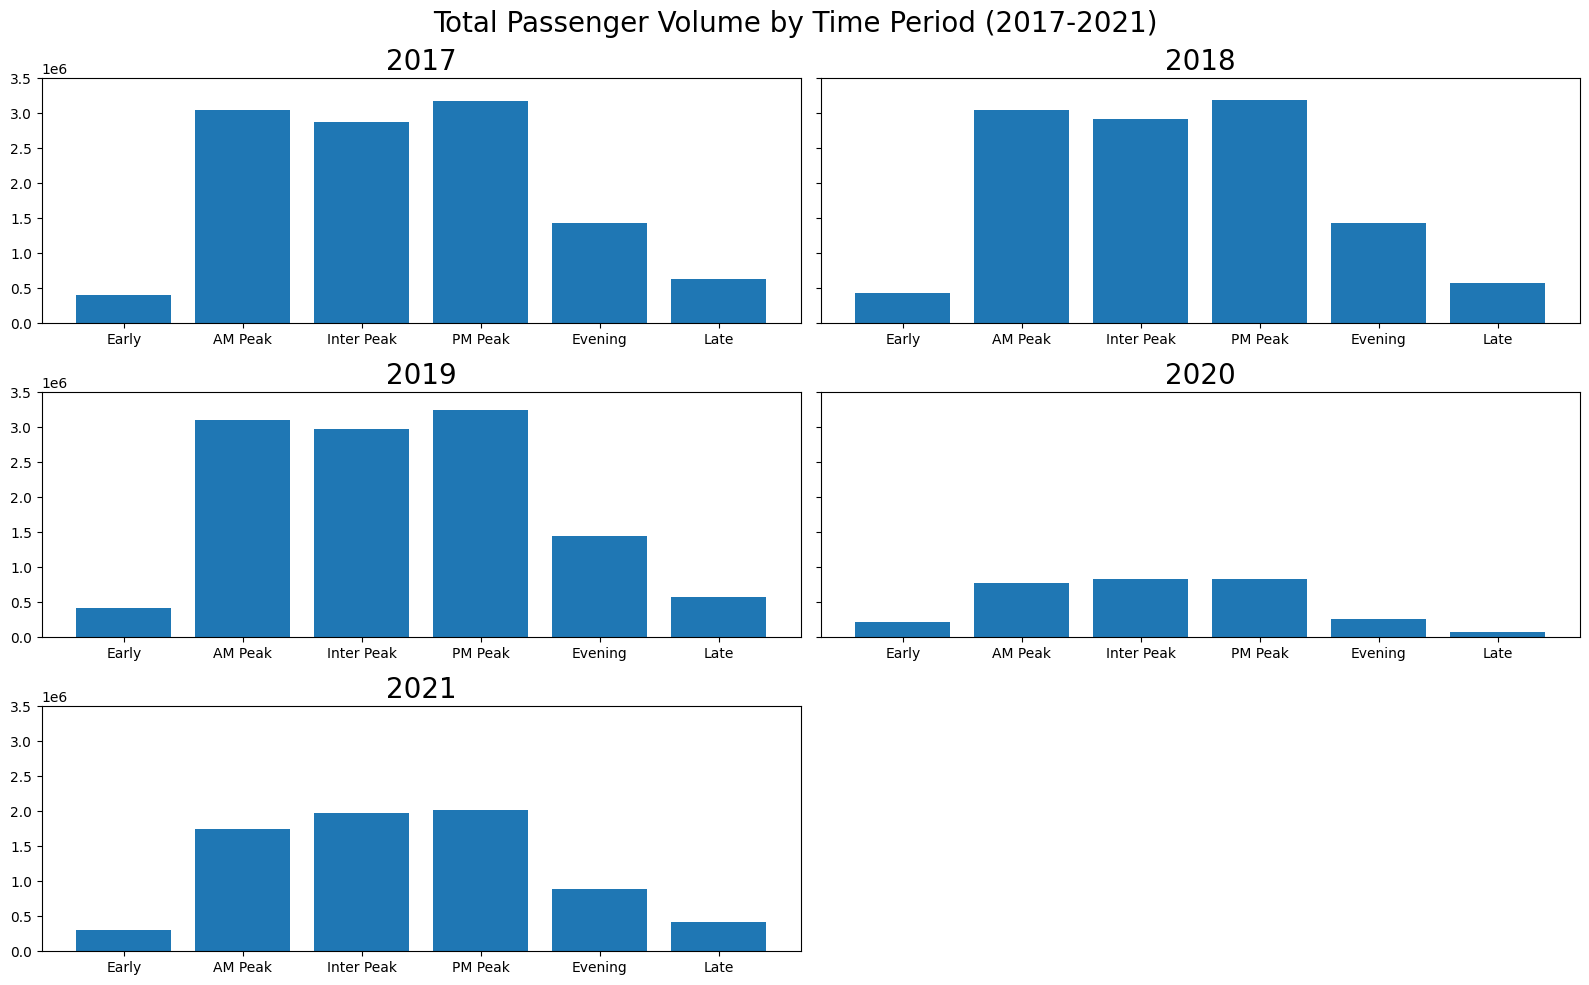

In [172]:
figure, axis = plt.subplots(3, 2, figsize=(16,10), sharey=True,  tight_layout=True)
labels=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late']
startangle=270
explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
autopct='%1.2f%%'
fontsize=20

# Bar Chart Breakdown
# axis[1].bar(height=df2021hr[df2021hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(),
#             x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
# axis[1].set_title("Bar Chart Breakdown");
# axis[1].set_ylim(0, 3_500_000); # added line to set y limit

axis[0, 0].bar(height=df2017hr[df2017hr['day']=='MTF'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 0].set_title("2017", fontdict={'fontsize': fontsize});

axis[0, 1].bar(height=df2018hr[df2018hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 1].set_title("2018", fontdict={'fontsize': fontsize});

axis[1, 0].bar(height=df2019hr[df2019hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 0].set_title("2019", fontdict={'fontsize': fontsize});

axis[1, 1].bar(height=df2020hr[df2020hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 1].set_title("2020", fontdict={'fontsize': fontsize});

axis[2, 0].bar(height=df2021hr[df2021hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[2, 0].set_title("2021", fontdict={'fontsize': fontsize});

axis[0,0].set_ylim(0, 3_500_000)
axis[0,1].set_ylim(0, 3_500_000)
axis[1,0].set_ylim(0, 3_500_000)
axis[1,1].set_ylim(0, 3_500_000)
axis[2,0].set_ylim(0, 3_500_000)

figure.suptitle("Total Passenger Volume by Time Period (2017-2021)", fontsize=20)

figure.delaxes(axis[2,1])


**Friday**

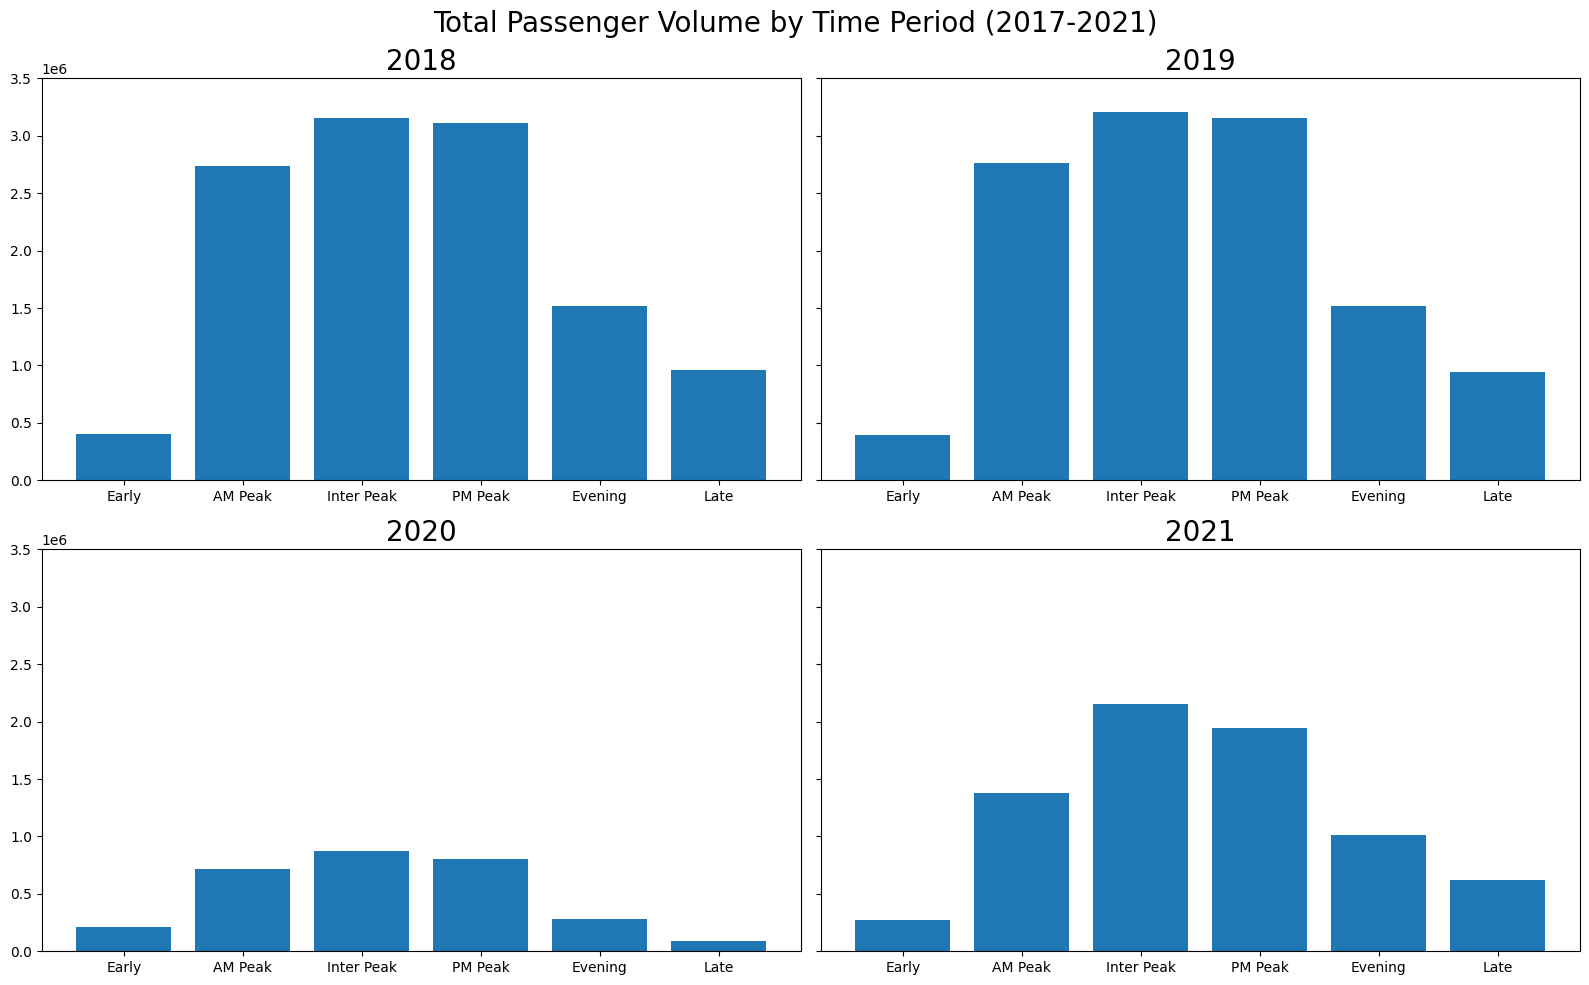

In [173]:
figure, axis = plt.subplots(2, 2, figsize=(16,10), sharey=True,  tight_layout=True)
labels=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late']
startangle=270
explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
autopct='%1.2f%%'
fontsize=20

axis[0, 0].bar(height=df2018hr[df2018hr['day']=='FRI'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 0].set_title("2018", fontdict={'fontsize': fontsize});

axis[0, 1].bar(height=df2019hr[df2019hr['day']=='FRI'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 1].set_title("2019", fontdict={'fontsize': fontsize});

axis[1, 0].bar(height=df2020hr[df2020hr['day']=='FRI'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 0].set_title("2020", fontdict={'fontsize': fontsize});

axis[1, 1].bar(height=df2021hr[df2021hr['day']=='FRI'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 1].set_title("2021", fontdict={'fontsize': fontsize});

axis[0,0].set_ylim(0, 3_500_000)
axis[0,1].set_ylim(0, 3_500_000)
axis[1,0].set_ylim(0, 3_500_000)
axis[1,1].set_ylim(0, 3_500_000)

figure.suptitle("Total Passenger Volume by Time Period (2017-2021)", fontsize=20);

**Saturdays**

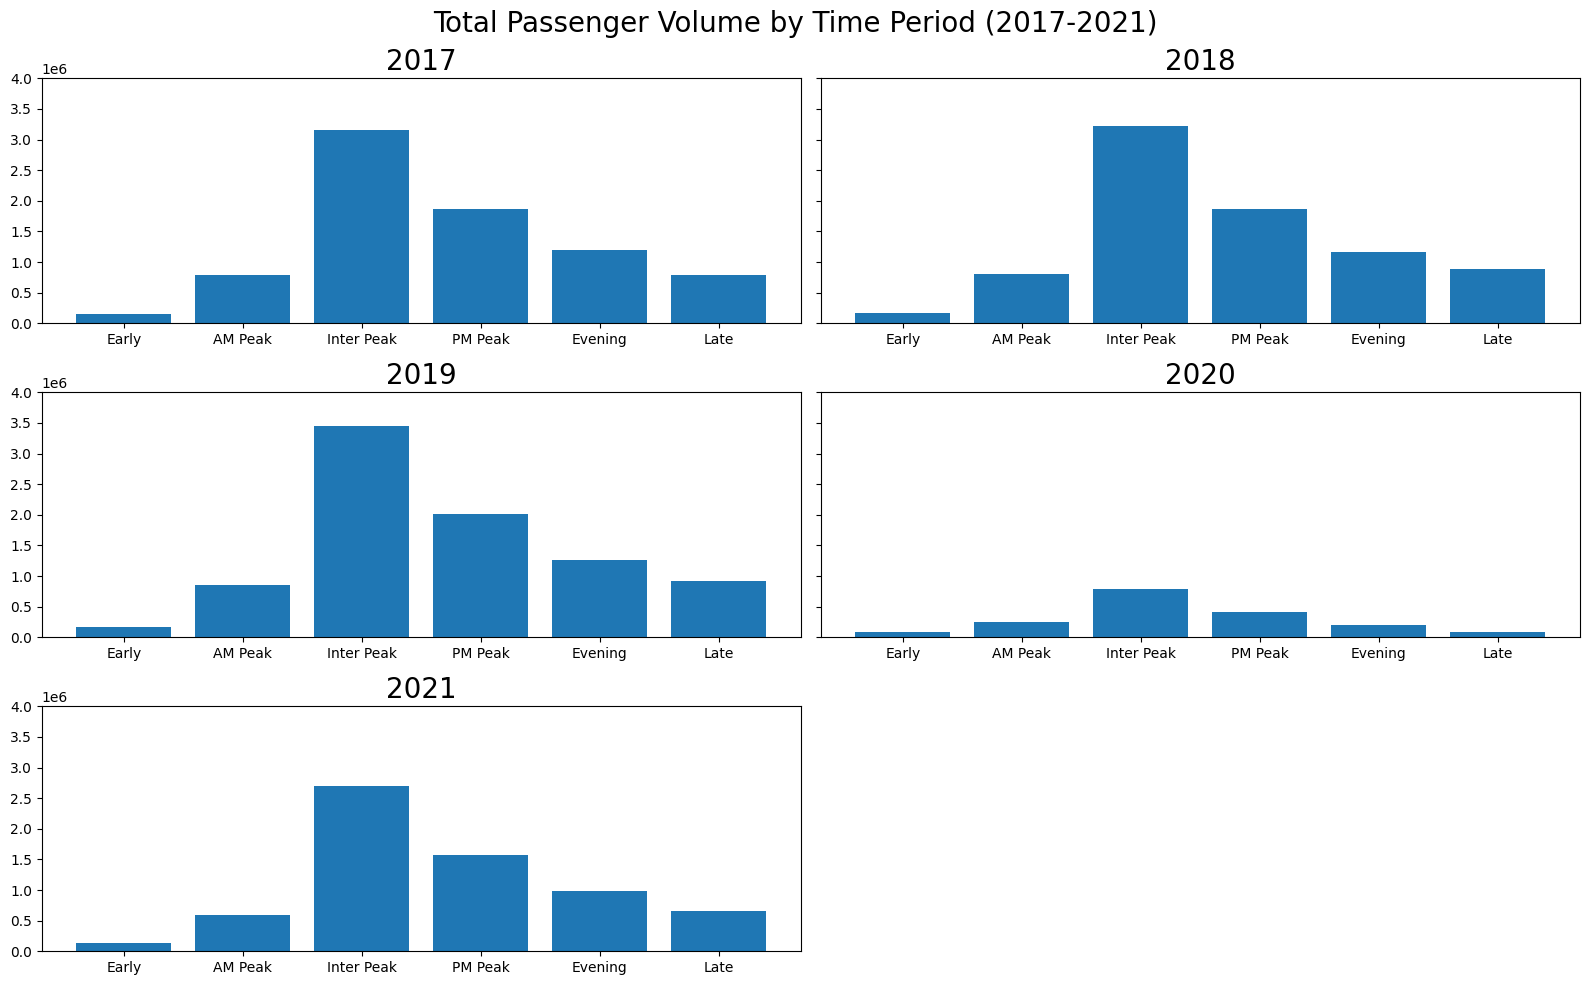

In [174]:
figure, axis = plt.subplots(3, 2, figsize=(16,10), sharey=True,  tight_layout=True)
labels=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late']
startangle=270
explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
autopct='%1.2f%%'
fontsize=20

axis[0, 0].bar(height=df2017hr[df2017hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 0].set_title("2017", fontdict={'fontsize': fontsize});

axis[0, 1].bar(height=df2018hr[df2018hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 1].set_title("2018", fontdict={'fontsize': fontsize});

axis[1, 0].bar(height=df2019hr[df2019hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 0].set_title("2019", fontdict={'fontsize': fontsize});

axis[1, 1].bar(height=df2020hr[df2020hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 1].set_title("2020", fontdict={'fontsize': fontsize});

axis[2, 0].bar(height=df2021hr[df2021hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[2, 0].set_title("2021", fontdict={'fontsize': fontsize});

axis[0,0].set_ylim(0, 4_000_000)
axis[0,1].set_ylim(0, 4_000_000)
axis[1,0].set_ylim(0, 4_000_000)
axis[1,1].set_ylim(0, 4_000_000)
axis[2,0].set_ylim(0, 4_000_000)

figure.suptitle("Total Passenger Volume by Time Period (2017-2021)", fontsize=20);

figure.delaxes(axis[2,1])

**Sundays**

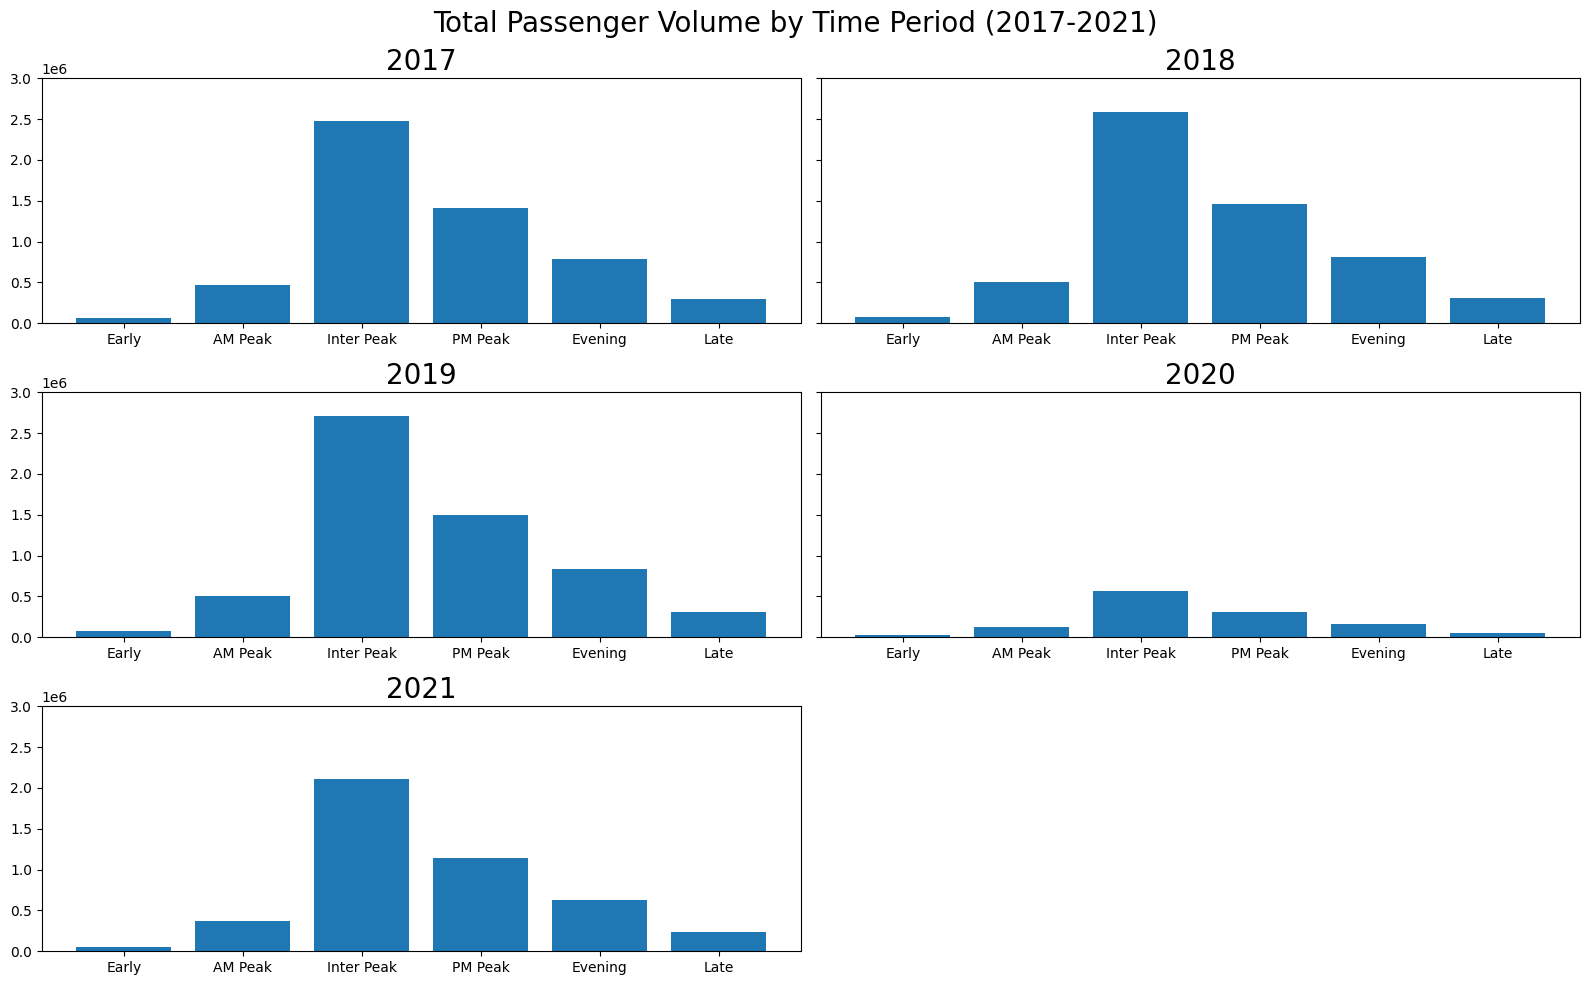

In [175]:
figure, axis = plt.subplots(3, 2, figsize=(16,10), sharey=True,  tight_layout=True)
labels=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late']
startangle=270
explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
autopct='%1.2f%%'
fontsize=20

axis[0, 0].bar(height=df2017hr[df2017hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 0].set_title("2017", fontdict={'fontsize': fontsize});

axis[0, 1].bar(height=df2018hr[df2018hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 1].set_title("2018", fontdict={'fontsize': fontsize});

axis[1, 0].bar(height=df2019hr[df2019hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 0].set_title("2019", fontdict={'fontsize': fontsize});

axis[1, 1].bar(height=df2020hr[df2020hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 1].set_title("2020", fontdict={'fontsize': fontsize});

axis[2, 0].bar(height=df2021hr[df2021hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[2, 0].set_title("2021", fontdict={'fontsize': fontsize});

axis[0,0].set_ylim(0, 3_000_000)
axis[0,1].set_ylim(0, 3_000_000)
axis[1,0].set_ylim(0, 3_000_000)
axis[1,1].set_ylim(0, 3_000_000)
axis[2,0].set_ylim(0, 3_000_000)

figure.suptitle("Total Passenger Volume by Time Period (2017-2021)", fontsize=20);

figure.delaxes(axis[2,1])

**Presented below is the Entry/Exit figures by time period, as percenatges, over the years**

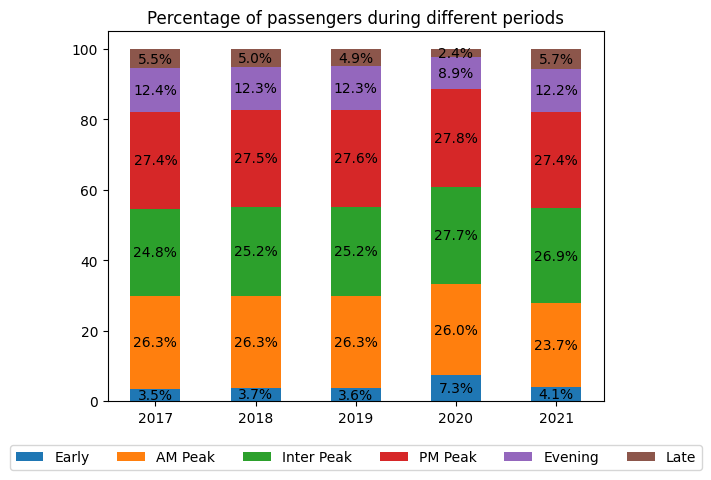

In [176]:
x = ('2017', '2018', '2019', '2020', '2021');

periods = {
    'Early': np.array([410606, 426922, 422622, 217860, 301384]), 
    'AM Peak': np.array([3050039, 3049475, 3100335, 779180, 1744411]),   
    'Inter Peak': np.array([2880265, 2920222, 2971552, 829986, 1979360]),  
    'PM Peak': np.array([3183198, 3194781, 3254342, 834653, 2011992]),
    'Evening': np.array([1439332, 1430876, 1447731, 266806, 893644]),
    'Late': np.array([637978, 580478, 581302, 71054, 419004])
};

total = np.sum(list(periods.values()), axis=0);
bottom = np.zeros(len(x));

width = 0.5

fig, ax = plt.subplots();

for boolean, periods in periods.items():
    p = ax.bar(x, periods / total * 100, width, label=boolean, bottom=bottom);
    bottom += periods / total * 100
    for i, bar in enumerate(p):
        x_pos = bar.get_x() + bar.get_width() / 2
        y_pos = bar.get_y() + bar.get_height() / 2
        value = '{:.1f}%'.format(periods[i] / total[i] * 100);
        ax.text(x_pos, y_pos, value, ha='center', va='center');

ax.set_title("Percentage of passengers during different periods");

# Move the legend outside the axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6);

plt.show();

###### Observations 🔎

- 🦠 Unsurprisingly, the Covid-19 pandemic has had a significant impact on TfL's passenger numbers in 2020 and 2021. 

- 📉 The fraction of passengers travelling during the 'AM Peak' period has dropped from an average of 26.3% to 23.7% in 2021. 💼 This could be due to the [rise of hybrid/remote work schedules](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/articles/ishybridworkingheretostay/2022-05-23), as more people are able to work from home and avoid the rush hour commute. The other periods have remained relatively stable over the years.

It will be interesting to see how these trends develop in 2022 when more data is made available.

### Creating indexes

Indexes can also be applied to gain insights into passenger behavior and usage patterns. By creating an index based on factors such as station popularity, time of day, and day of the week, we can identify the busiest and least busy stations, as well as how other stations on the network are trending.

As we noticed earlier, the Covid-19 pandemic has had a drastic effect on commuter figures through London. To find the impact of the pandemic on ridership at specific stations, the average passengers for pre and post-covid years is calculated and used to create the 'Post-Covid impact' index. The calculated index will be a factor between 0 & 1 representing how close the ridership is to pre-COVID levels. That is to say:
- *The closer a station's 'Post-Covid impact' index is to 1, the less affected it was because its commuter figure is closer to pre-pandemic levels.* 
- *and the closer a station's index is to 0, the more affected it was as its commuter figure is significantly lower than pre-pandemic levels.* 

It is worth noting that some specific change in passenger behavior in this period is not attributable to the effects of COVID. For example, changes in passenger behaviour (adoption of hybrid/remote work schedules), station closure or network changes can also impact the data. We will look into this later on and comment on any areas where this is likely the case.

**Note:** 
All stations which opened after 2019, will not be considered in this analysis.

In [177]:
df_merged['Post-Covid impact'] = 1-(df_merged[["En/Ex 2017", "En/Ex 2018", "En/Ex 2019"]].mean(axis=1, skipna=True) - 
                                    df_merged[["En/Ex 2021"]].mean(axis=1, skipna=False))/(
                                    df_merged[["En/Ex 2017", "En/Ex 2018", "En/Ex 2019"]].mean(axis=1, skipna=True)) 
df_merged.sample(5) 

NLC            Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
386  6949.0    Theobalds Grove         NaN         NaN         NaN   
244   758.0  West Hampstead LU   7459006.0   7364953.0   7448967.0   
361  5421.0       Denmark Hill         NaN         NaN         NaN   
77    583.0    Gloucester Road  13606370.0  13523413.0  13734309.0   
208   719.0          Stratford  25627136.0  27231042.0  26989730.0   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
386         NaN         NaN         NaN         NaN         NaN         NaN   
244   7452098.0   8234838.0   9713151.0  10159492.0  10590656.0  11160117.0   
361         NaN         NaN         NaN         NaN         NaN         NaN   
77   14484620.0  14162419.0  14193918.0  14912967.0  11963929.0  14203922.0   
208  29819454.0  48571300.0  50962909.0  54503326.0  59308320.0  61442630.0   

     En/Ex 2016   En/Ex 2017   En/Ex 2018   En/Ex 2019  En/Ex 2020  \
386         NaN     743156.0     734754.0     770253.0    392947.0   
244  11039789.0   11207001.0   10317092.0   10488823.0   4955039.0   
361         NaN    7709693.0    7382684.0    7990260.0   3742004.0   
77   13975040.0   13100020.0   13311849.0   13738684.0   3933949.0   
208  67047270.0  111539219.0  112577515.0  118564624.0  53788483.0   

     En/Ex 2021  Post-Covid impact  
386    466660.0           0.622722  
244   4472941.0           0.419169  
361   4447266.0           0.578001  
77    6967643.0           0.520614  
208  63439192.0           0.555378

**Plotted below are the most affected stations by our 'Post-Covid impact' index**

In [178]:
px.bar(df_merged.dropna(thresh=7).sort_values('Post-Covid impact', ascending=True).head(20),
       # Threshold of 7 non-NA values to filter stations with less than 4 years of data
       y='Station',
       x='Post-Covid impact'
      )

Another interesting angle is looking at how the network has changed in the past few years.

As I mentioned earlier, not all recent change is attributable to the effects of the pandemic. For a snapshot of this, we will create two indices 'Upturn' and 'Downturn'. These indexes will look at the stations with the greatest upturn and downturn in commuter figures after 2020 respectively. 

Now. we'll set a threshold for which station will make it on our maps and explain any reasons for disqualification

In [179]:
df_plot=df_merged.sort_values('Post-Covid impact', ascending=False).dropna(thresh=5)
df_plot['Post-Covid impact']=df_plot['Post-Covid impact'].round(3)
print(df_plot.shape)
df_plot.tail()

(416, 18)


NLC                 Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
184   695.0        St. James's Park  13084320.0  13189508.0  13424654.0   
33    536.0        Cannon Street LU   4109347.0   4540496.0   3932511.0   
291   858.0                  Poplar         NaN         NaN         NaN   
266   781.0  Heathrow Terminal 4 LU   2110256.0   1173324.0   1767759.0   
422  7091.0  Heathrow Terminal 4 EL         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
184  13300266.0  13496515.0  14261759.0  14726104.0  15730145.0  15698186.0   
33    3947306.0   4047494.0   4088480.0   4644524.0   5299813.0   7485065.0   
291         NaN         NaN         NaN         NaN         NaN         NaN   
266   2142085.0   2459358.0   2436725.0   2427793.0   7655649.0   2347501.0   
422         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
184  14934536.0  13664987.0  14169247.0  14479978.0   2919119.0   3901970.0   
33    8983249.0   8996282.0   7399745.0   7108243.0   1559861.0   2147772.0   
291         NaN   4713917.0   4567851.0   4967283.0   1135902.0    825604.0   
266   2278746.0   2146778.0   2127743.0   2125220.0         0.0         0.0   
422         NaN         NaN   1420311.0   1426266.0         0.0         0.0   

     Post-Covid impact  
184              0.277  
33               0.274  
291              0.174  
266              0.000  
422              0.000

In [211]:
df1 = pd.read_csv('data/Geodata/Stations_20220221.csv')
df1 = df1.drop(df1[df1.LINES == 'Tramlink'].index) # Dropping any stations on the Tramlink Network
df1.sample(4)

NLC              NAME  EASTING  NORTHING              LINES  \
307  5423       Peckham Rye   534222    176360  London Overground   
294   661         Northwood   509230    191419       Metropolitan   
400   727  Tooting Broadway   527434    171443           Northern   
209   608      Holland Park   524626    180217            Central   

                NETWORK London Underground Elizabeth Line London Overground  \
307                 NaN                NaN            NaN               Yes   
294  London Underground                Yes            NaN               NaN   
400  London Underground                Yes            NaN               NaN   
209  London Underground                Yes            NaN               NaN   

     DLR Zone         x          y  
307  NaN    2 -0.067331  51.469779  
294  NaN    6 -0.422359  51.610520  
400  NaN    3 -0.166791  51.427157  
209  NaN    2 -0.204063  51.506644

In [181]:
df_downturn=pd.merge(df_merged[df_merged['En/Ex 2020'] > df_merged['En/Ex 2021']],
                     df1,
                     on='NLC') # Creating a DF of all the stations which saw a decrease in commuter figures
df_downturn['Downturn'] = df_downturn["En/Ex 2021"]/df_downturn["En/Ex 2020"] # Calculating the 'Downturn' of the selected stations
df_downturn = df_downturn[['Downturn'] + [x for x in df_downturn.columns if x != 'Downturn']] # Just rearrnging the order of the columns to place Downturn first 
df_downturn = df_downturn.query('Downturn <= 0.75') # Setting the qualifier for stations in the DF
df_downturn.sort_values('Downturn', ascending=True, inplace=True)
df_downturn['Downturn']=df_downturn['Downturn'].round(3)
df_downturn = df_downturn.head(30)
df_downturn["Coordinates"] = list(zip(df_downturn.EASTING, df_downturn.NORTHING)) # Creating geodata
df_downturn["Coordinates"] = df_downturn["Coordinates"].apply(Point)
gdf_downturn = gpd.GeoDataFrame(df_downturn, geometry="Coordinates") # Creates a Geopandas DF with the geodata
df_downturn.shape[0] # Shows how many stations are present in the DF.

30

In [182]:
df_downturn.head(5)

Downturn     NLC                 Station  En/Ex 2007  En/Ex 2008  \
186     0.391  9846.0  Heathrow Terminal 5 EL         NaN         NaN   
32      0.487   563.0              East Acton   3643990.0   3898147.0   
26      0.601   555.0           Dagenham East   2091664.0   2144847.0   
127     0.613   720.0            Sudbury Hill   2211931.0   2112878.0   
27      0.630   556.0       Dagenham Heathway   3724772.0   4081804.0   

     En/Ex 2009  En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  \
186         NaN         NaN         NaN         NaN         NaN         NaN   
32    3514320.0   3410281.0   3408355.0   3473199.0   3881384.0   4016859.0   
26    2161884.0   2114481.0   2222392.0   2288282.0   2418659.0   2662063.0   
127   2008126.0   1959018.0   2006325.0   2032858.0   2007949.0   2211298.0   
27    4239210.0   4204570.0   4710937.0   4912327.0   5156354.0   5800005.0   

     En/Ex 2015  En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  \
186         NaN         NaN         NaN         NaN         NaN    668011.0   
32    4009433.0   4122793.0   3872967.0   3866457.0   4081695.0   2726902.0   
26    2858892.0   2976440.0   2850852.0   2889563.0   2953138.0   2490581.0   
127   2217946.0   1976543.0   1790959.0   1776550.0   1910960.0   1451606.0   
27    6065247.0   6043690.0   5779848.0   5763663.0   5853372.0   4552421.0   

     En/Ex 2021  Post-Covid impact                    NAME  EASTING  NORTHING  \
186    260928.0                NaN  Heathrow Terminal 5 EL   505109    175924   
32    1326939.0           0.336755              East Acton   521721    181198   
26    1496282.0           0.516342           Dagenham East   550294    185030   
127    889529.0           0.487105            Sudbury Hill   515412    185542   
27    2869564.0           0.494841       Dagenham Heathway   549023    184710   

          LINES             NETWORK London Underground Elizabeth Line  \
186    TfL Rail                 NaN                NaN            Yes   
32      Central  London Underground                Yes            NaN   
26     District  London Underground                Yes            NaN   
127  Piccadilly  London Underground                Yes            NaN   
27     District  London Underground                Yes            NaN   

    London Overground  DLR Zone         x          y  \
186               NaN  NaN    6 -0.486476  51.472016   
32                NaN  NaN    2 -0.245569  51.516090   
26                NaN  NaN    5  0.167617  51.543650   
127               NaN  NaN    4 -0.335039  51.556464   
27                NaN  NaN    5  0.149158  51.541106   

                       Coordinates  
186  POINT (505109.000 175924.000)  
32   POINT (521721.000 181198.000)  
26   POINT (550294.000 185030.000)  
127  POINT (515412.000 185542.000)  
27   POINT (549023.000 184710.000)

In [183]:
px.bar(df_downturn.sort_values('Downturn', ascending=True),
       # Threshold of 7 non-NA values to filter stations with less than 4 years of data
       y='Station',
       x='Downturn',
       height=850
)

In [184]:
df_upturn=pd.merge(df_merged[df_merged['En/Ex 2020'] < df_merged['En/Ex 2021']],              
                   df1,              
                   on='NLC') # Creating a DF of all the stations which saw an increase in commuter figures
df_upturn['Upturn'] = df_upturn["En/Ex 2021"]/df_upturn["En/Ex 2020"] # Calculating the 'Upturn' of the selected stations
df_upturn = df_upturn[['Upturn'] + [x for x in df_upturn.columns if x != 'Upturn']] # Just rearrnging the order of the columns to place Downturn first 
df_upturn = df_upturn.query('Upturn >= 1.7') # Setting the qualifier for stations in the DF
df_upturn.sort_values('Upturn', ascending=False, inplace=True)
df_upturn['Upturn']=df_upturn['Upturn'].round(3)
df_upturn = df_upturn.head(30)
df_upturn["Coordinates"] = list(zip(df_upturn.EASTING, df_upturn.NORTHING)) # Creating geodata
df_upturn["Coordinates"] = df_upturn["Coordinates"].apply(Point)
gdf_upturn = gpd.GeoDataFrame(df_upturn, geometry="Coordinates") # Creates a Geopandas DF with the geodata
df_upturn.shape[0] # Shows how many stations are present in the DF.

30

In [185]:
df_upturn.head(5)

Upturn     NLC     Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
231  62.484  3155.0     Twyford         NaN         NaN         NaN   
228  19.235  3147.0  Maidenhead         NaN         NaN         NaN   
230  12.786  3151.0      Taplow         NaN         NaN         NaN   
234   9.261  3172.0      Slough         NaN         NaN         NaN   
236   8.417  3176.0     Burnham         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
231         NaN         NaN         NaN         NaN         NaN         NaN   
228         NaN         NaN         NaN         NaN         NaN         NaN   
230         NaN         NaN         NaN         NaN         NaN         NaN   
234         NaN         NaN         NaN         NaN         NaN         NaN   
236         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
231         NaN         NaN         NaN         NaN     13407.0    837725.0   
228         NaN         NaN         NaN         NaN    102141.0   1964707.0   
230         NaN         NaN         NaN         NaN     20878.0    266945.0   
234         NaN         NaN         NaN         NaN    234410.0   2170889.0   
236         NaN         NaN         NaN         NaN    106258.0    894325.0   

     Post-Covid impact        NAME  EASTING  NORTHING     LINES NETWORK  \
231                NaN     Twyford   479041    175787  TfL Rail     NaN   
228                NaN  Maidenhead   488724    180745  TfL Rail     NaN   
230                NaN      Taplow   491579    181340  TfL Rail     NaN   
234                NaN      Slough   497838    180157  TfL Rail     NaN   
236                NaN     Burnham   494007    181378  TfL Rail     NaN   

    London Underground Elizabeth Line London Overground  DLR Zone         x  \
231                NaN            Yes               NaN  NaN   -1 -0.863307   
228                NaN            Yes               NaN  NaN   -1 -0.722675   
230                NaN            Yes               NaN  NaN   -1 -0.681385   
234                NaN            Yes               NaN  NaN   -1 -0.591525   
236                NaN            Yes               NaN  NaN   -1 -0.646388   

             y                    Coordinates  
231  51.475533  POINT (479041.000 175787.000)  
228  51.518667  POINT (488724.000 180745.000)  
230  51.523561  POINT (491579.000 181340.000)  
234  51.511879  POINT (497838.000 180157.000)  
236  51.523504  POINT (494007.000 181378.000)

Notes:
- [East Acton station was underwent extensive renovation from 2021 to 2022](https://web.archive.org/web/20230130222836/https://tfl.gov.uk/corporate/transparency/freedom-of-information/foi-request-detail?referenceId=FOI-2730-2122)


**Below we can see the breakdown of which networks carry these stations**

In [186]:
print('Out of the top 30 stations by Downturn:')
print(gdf_downturn[gdf_downturn['London Underground'] == 'Yes'].shape[0], 'are on the London Underground') 
print(gdf_downturn[gdf_downturn['London Overground'] == 'Yes'].shape[0], 'are on the London Overground')
print(gdf_downturn[gdf_downturn['DLR'] == 'Yes'].shape[0], 'are on the DLR')
print(gdf_downturn[gdf_downturn['Elizabeth Line'] == 'Yes'].shape[0], 'is on the Elizabeth Line')
print(" ")
print('Out of the top 30 stations by Upturn:')
print(gdf_upturn[gdf_upturn['London Underground'] == 'Yes'].shape[0], 'are on the London Underground')
print(gdf_upturn[gdf_upturn['London Overground'] == 'Yes'].shape[0], 'are on the London Overground')
print(gdf_upturn[gdf_upturn['DLR'] == 'Yes'].shape[0], 'are on the DLR')
print(gdf_upturn[gdf_upturn['Elizabeth Line'] == 'Yes'].shape[0], 'are on the Elizabeth Line')

# The figures may add up to more than 30 as a station can be on multiple TfL networks

Out of the top 30 stations by Downturn:
28 are on the London Underground
5 are on the London Overground
0 are on the DLR
1 is on the Elizabeth Line
 
Out of the top 30 stations by Upturn:
17 are on the London Underground
2 are on the London Overground
5 are on the DLR
7 are on the Elizabeth Line


###### Observations 🔎
- 📉 We notice that 28 of the 30 stations trending downward are on the London Underground.
- 📈 7 of the stations on the newly built Elizabeth line also flesh out the stations trending upward.

### Plotting Stations

In this next segment, we will be creating indexes and plotting the TfL stations to analyze the commuter data. 

#### A couple things we'll need to make our maps look better...

These are a couple utlities and calls that will make our graphs down below look better and more informative. Again, you can choose to collapse this section with a click of a button 🤏 and move on to the next. That is where all the fun is anyway.

In [187]:
tube_lines = {
    "Bakerloo":             {"id":"B", "colour":"#B36305", "network":"Tube"},
    "Central":              {"id":"C", "colour":"#E32017", "network":"Tube"},
    "Circle":               {"id":"I", "colour":"#FFD300", "network":"Tube"},
    "Elizabeth line":       {"id":"X", "colour":"#7156A5", "network":"Rail"},
    "DLR":                  {"id":"L", "colour":"#00A4A7", "network":"Rail"},
    "District":             {"id":"D", "colour":"#00782A", "network":"Tube"},
    "Hammersmith & City":   {"id":"H", "colour":"#F3A9BB", "network":"Tube"},
    "Jubilee":              {"id":"J", "colour":"#A0A5A9", "network":"Tube"},
    "Metropolitan":         {"id":"M", "colour":"#9B0056", "network":"Tube"},
    "Northern":             {"id":"N", "colour":"#000000", "network":"Tube"},
    "London Overground":    {"id":"O", "colour":"#EE7C0E", "network":"Rail"},
    "Piccadilly":           {"id":"P", "colour":"#003688", "network":"Tube"},
    "Tramlink":             {"id":"T", "colour":"#84B817", "network":"Tramlink"},
    "Victoria":             {"id":"V", "colour":"#0098D4", "network":"Tube"},
    "Waterloo & City":      {"id":"W", "colour":"#95CDBA", "network":"Tube"}
} # The Tube lines and their corresponding colour scheme and network.

In [188]:
# Define the style function for 
def style_function(feature):
    line_id = feature["properties"]["id"]
    line_colour = tube_lines[line_id]["colour"]
    return {
        "color": line_colour,
        "weight": 4,
        "opacity": 0.8,
    }

In [189]:
ldn_df = gpd.read_file("data/Geodata/London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp")
ldn_df.sample(3)

NAME   GSS_CODE        DISTRICT  LAGSSCODE  HECTARES  NONLD_AREA  \
320     Bowes  E05000193         Enfield  E09000010   148.337         0.0   
329    Leyton  E05000604  Waltham Forest  E09000031   203.218         0.0   
204  Oakleigh  E05000058          Barnet  E09000003   331.861         0.0   

                                              geometry  
320  POLYGON ((530568.400 192086.995, 530653.300 19...  
329  POLYGON ((537572.901 185494.702, 537572.703 18...  
204  POLYGON ((525325.803 195871.502, 525404.502 19...

In [190]:
ldn_df2=gpd.read_file("data/Geodata/London-shp-files/lp-falp-2006-inner-outer-london.shp")
ldn_df2

Designated                                             Source  \
0      Inner  The London Plan consolidated with alterations ...   
1      Outer  The London Plan consolidated with alterations ...   

      Shape_Leng    Shape_Area  \
0  130298.412266  3.279628e+08   
1  386483.894147  1.266756e+09   

                                            geometry  
0  POLYGON ((539430.398 180419.005, 539410.799 18...  
1  POLYGON ((553563.496 178641.204, 553615.498 17...

In [191]:
df1 = pd.read_csv('data/Geodata/Stations_20220221.csv')
df1 = df1.drop(df1[df1.LINES == 'Tramlink'].index)
df1.sample(4)

NLC               NAME  EASTING  NORTHING              LINES  \
444  1421  West Hampstead LO   525579    184651  London Overground   
232   622            Kilburn   524583    184645            Jubilee   
274   646          Moor Park   508606    193503       Metropolitan   
464  6954        Wood Street   538493    189407  London Overground   

                NETWORK London Underground Elizabeth Line London Overground  \
444                 NaN                NaN            NaN               Yes   
232  London Underground                Yes            NaN               NaN   
274  London Underground                Yes            NaN               NaN   
464                 NaN                NaN            NaN               Yes   

     DLR Zone         x          y  
444  NaN    2 -0.188760  51.546283  
232  NaN    2 -0.203116  51.546448  
274  NaN  6,7 -0.430710  51.629375  
464  NaN    4 -0.000741  51.586003

In [192]:
df1["Coordinates"] = list(zip(df1.EASTING, df1.NORTHING))
df1["Coordinates"] = df1["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df1, geometry="Coordinates")
gdf.sample()

NLC           NAME  EASTING  NORTHING                 LINES  \
408  734  Turnham Green   521266    178779  District, Piccadilly   

                NETWORK London Underground Elizabeth Line London Overground  \
408  London Underground                Yes            NaN               NaN   

     DLR Zone         x          y                    Coordinates  
408  NaN  2,3 -0.252959  51.494448  POINT (521266.000 178779.000)

In [193]:
url = (
    "https://raw.githubusercontent.com/Osakwe1/vis/master/tubecreature/data"
)
tfl_network = f"{url}/tfl_lines.json"

Now. we'll set a threshold for which station will make it on our maps and explain any reasons for disqualification

In [194]:
df_plot.head()

NLC          Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
416  3087.0    Paddington NR         NaN         NaN         NaN         NaN   
304   887.0     Custom House         NaN         NaN         NaN         NaN   
420  3191.0          Hanwell         NaN         NaN         NaN         NaN   
418  3187.0         Southall         NaN         NaN         NaN         NaN   
298   866.0  West India Quay         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
416         NaN         NaN         NaN         NaN         NaN         NaN   
304         NaN         NaN         NaN         NaN         NaN         NaN   
420         NaN         NaN         NaN         NaN         NaN         NaN   
418         NaN         NaN         NaN         NaN         NaN         NaN   
298         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
416         NaN   4086849.0   4722949.0   5977071.0   8513238.0   
304         0.0   2242447.0   2205585.0    774342.0   2065445.0   
420         NaN    364993.0    675795.0    387664.0    576380.0   
418         NaN   1723747.0   2563229.0   1429088.0   2294079.0   
298   1280769.0   1355439.0   1305312.0    296160.0   1329826.0   

     Post-Covid impact  
416              1.933  
304              1.393  
420              1.108  
418              1.070  
298              1.012

In [195]:
df_plot1=df_merged.sort_values('Post-Covid impact', ascending=False).dropna(thresh=2)
df_plot1['Post-Covid impact']=df_plot['Post-Covid impact'].round(3)
print(df_plot1.shape)
df_plot1.sample()

(435, 18)


NLC        Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
313  898.0  Elverson Road         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
313         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
313   1965251.0   1683418.0   1700793.0    992404.0    884912.0   

     Post-Covid impact  
313              0.496

In [196]:
df_plot=df_merged.sort_values('Post-Covid impact', ascending=False).dropna(thresh=5)
df_plot['Post-Covid impact']=df_plot['Post-Covid impact'].round(3)
print(df_plot.shape)
df_plot.sample()

(416, 18)


NLC    Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
273  599.0  Wood Lane         NaN   3820056.0   3099767.0   3349472.0   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
273   3437870.0   3651658.0   3444011.0   3982886.0   3698414.0   3678778.0   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
273   3804000.0   4524340.0   4739497.0   1359848.0   2194795.0   

     Post-Covid impact  
273              0.504

##### Done!

Now that we have all this set up, we can begin creating plots of our data.

#### Plots using Folium, Geopandas & Matplotlib

##### As a start, here is every station on the TfL network (including Tramlink!)

In [197]:
df1.keys()

Index(['NLC', 'NAME', 'EASTING', 'NORTHING', 'LINES', 'NETWORK',
       'London Underground', 'Elizabeth Line', 'London Overground', 'DLR',
       'Zone', 'x', 'y', 'Coordinates'],
      dtype='object')

<AxesSubplot:>

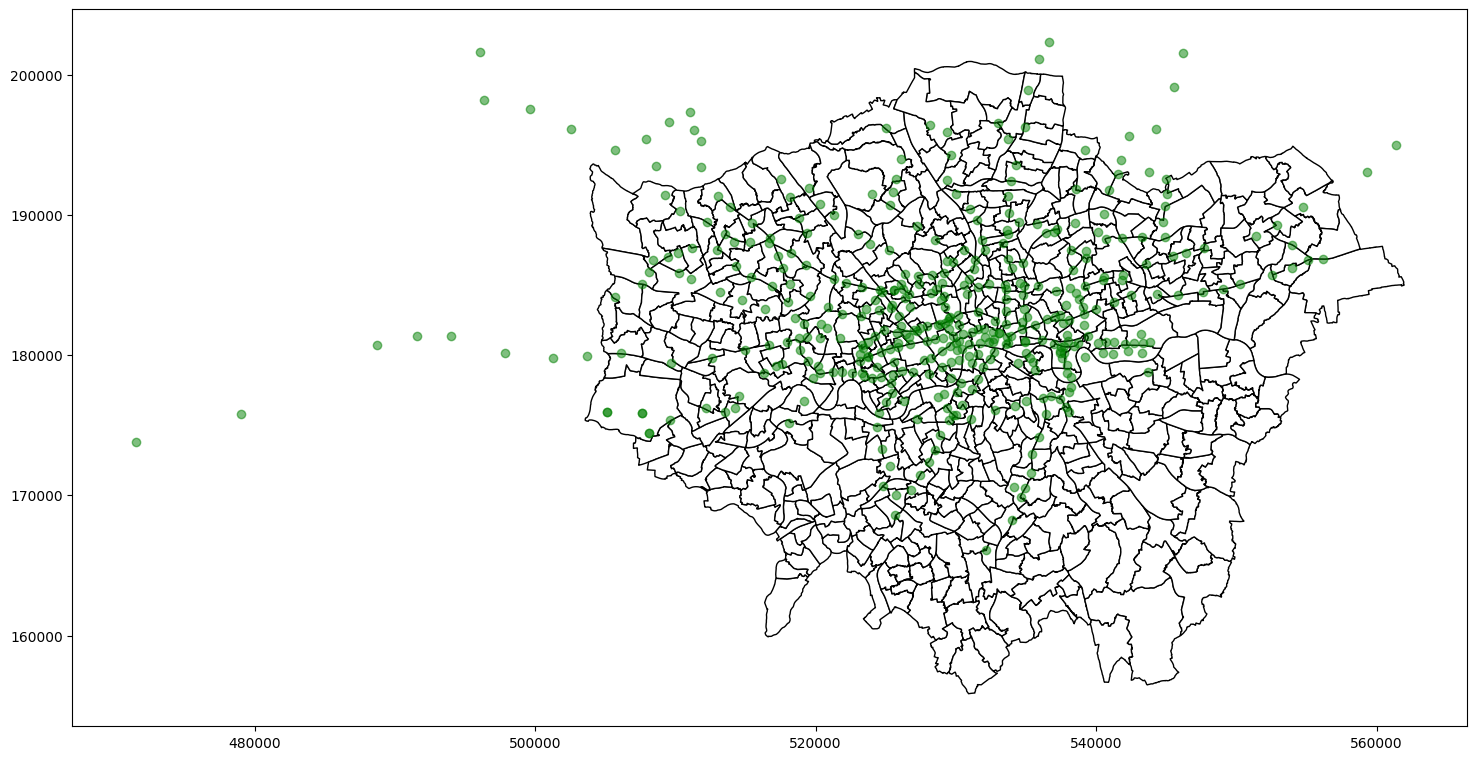

In [198]:
### Creating a Geopandas dataframe of all TfL stations
df_all=pd.merge(df_plot1,
                df1,
                on='NLC',   
                how='inner').drop(columns=['NETWORK', 'Zone'])
df_all["Coordinates"] = list(zip(df_all.EASTING, df_all.NORTHING))
df_all["Coordinates"] = df_all["Coordinates"].apply(Point)
gdf_all = gpd.GeoDataFrame(df_all, geometry="Coordinates")

# Creating a Geopandas dataframe of the bottom 30 stations by the 'Post-Covid impact' index
df_btm30=pd.merge(df_plot.tail(30),
                  df1,
                  on='NLC',
                  how='left')
df_btm30["Coordinates"] = list(zip(df_btm30.EASTING, df_btm30.NORTHING))
df_btm30["Coordinates"] = df_btm30["Coordinates"].apply(Point)
gdf_btm30 = gpd.GeoDataFrame(df_btm30, geometry="Coordinates")

# Creating a Geopandas dataframe of the top 30 stations by the 'Post-Covid impact' index
df_top30=pd.merge(df_plot.head(30),
                  df1, 
                  on='NLC',
                  how='left').drop(columns=['NETWORK'])
df_top30["Coordinates"] = list(zip(df_top30.EASTING, df_top30.NORTHING))
df_top30["Coordinates"] = df_top30["Coordinates"].apply(Point)
gdf_top30 = gpd.GeoDataFrame(df_top30, geometry="Coordinates")

# A plot of the all TfL stations
fig, gax = plt.subplots(figsize=(18, 18))
ldn_df.plot(ax=gax, edgecolor="black", color="white")
gdf_all.plot(ax=gax, color='green', alpha = 0.5)

**This is a nice map but it doesnt really show us where the stations are or which lines are running through them.**
 
 To produce a more informative map, we can use Folium! Here is a map of all the TfL lines running through London plotted using Folium:

In [199]:
# Create the GeoJson layer with the style function
map = folium.Map(location=[51.55, -0.33], tiles="Stamen Terrain", zoom_start=9)
tube_layer = folium.GeoJson(
    tfl_network,
    name="Tube map",
    style_function=style_function
)

# Add the layer to the map
tube_layer.add_to(map)

# Create a legend using the tube_lines dictionary
legend_html = """
<div style="position: fixed; 
     bottom: 50px; 
     left: 50px; 
     width: 160px; 
     height: 500px; 
     border: 2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     ">
     &nbsp; TfL Lines <br>
"""

for line_name, line_info in tube_lines.items():
    legend_html += f"""
     &nbsp; <span style="color:{line_info['colour']}; 
                  font-size: 20px;">&#9679;</span> 
                  {line_name} <br>
    """

legend_html += "</div>"

map.get_root().html.add_child(folium.Element(legend_html))
map

##### Now, here is the map containing all TfL stations using Folium and json: 

In [215]:
map = folium.Map(location=[51.55, -0.33], tiles="Stamen Terrain", zoom_start=9)
# folium.GeoJson(data=ldn_df["geometry"]).add_to(map)

for i,row in gdf.iterrows():
    #Setup the content of the popup
    iframe = folium.IFrame(str(row["NAME"] + ' St.'))
    
    #Initialise the popup using the iframe
    popup = folium.Popup(iframe, min_width= 100, max_width=200)
    #Add each row to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup).add_to(map)
    
folium.GeoJson(tfl_network, name="Tube map", style_function=style_function).add_to(map)

folium.LayerControl().add_to(map)

# Create a legend using the tube_lines dictionary
legend_html = """
<div style="position: fixed; 
     bottom: 50px; 
     left: 50px; 
     width: 160px; 
     height: 480px; 
     border: 2px solid grey; 
     z-index:9999; 
     font-size:14px;
     background-color:white;
     ">
     &nbsp; TfL Lines <br>
"""

for line_name, line_info in tube_lines.items():
    legend_html += f"""
     &nbsp; <span style="color:{line_info['colour']}; 
                  font-size: 20px;">&#9679;</span> 
                  {line_name} <br>
    """

legend_html += "</div>"

map.get_root().html.add_child(folium.Element(legend_html))

map

So now we know how the plots look, let's build some maps

Earlier, we created the 'Post-covid index' to take a deeper look at recent trends on the TfL network. Now for an even clearer image, we will be plotting the stations in both DFs.

###### Here we have the top 30 & bottom 30 stations by 'Post-covid index' in blue and red. 

<AxesSubplot:>

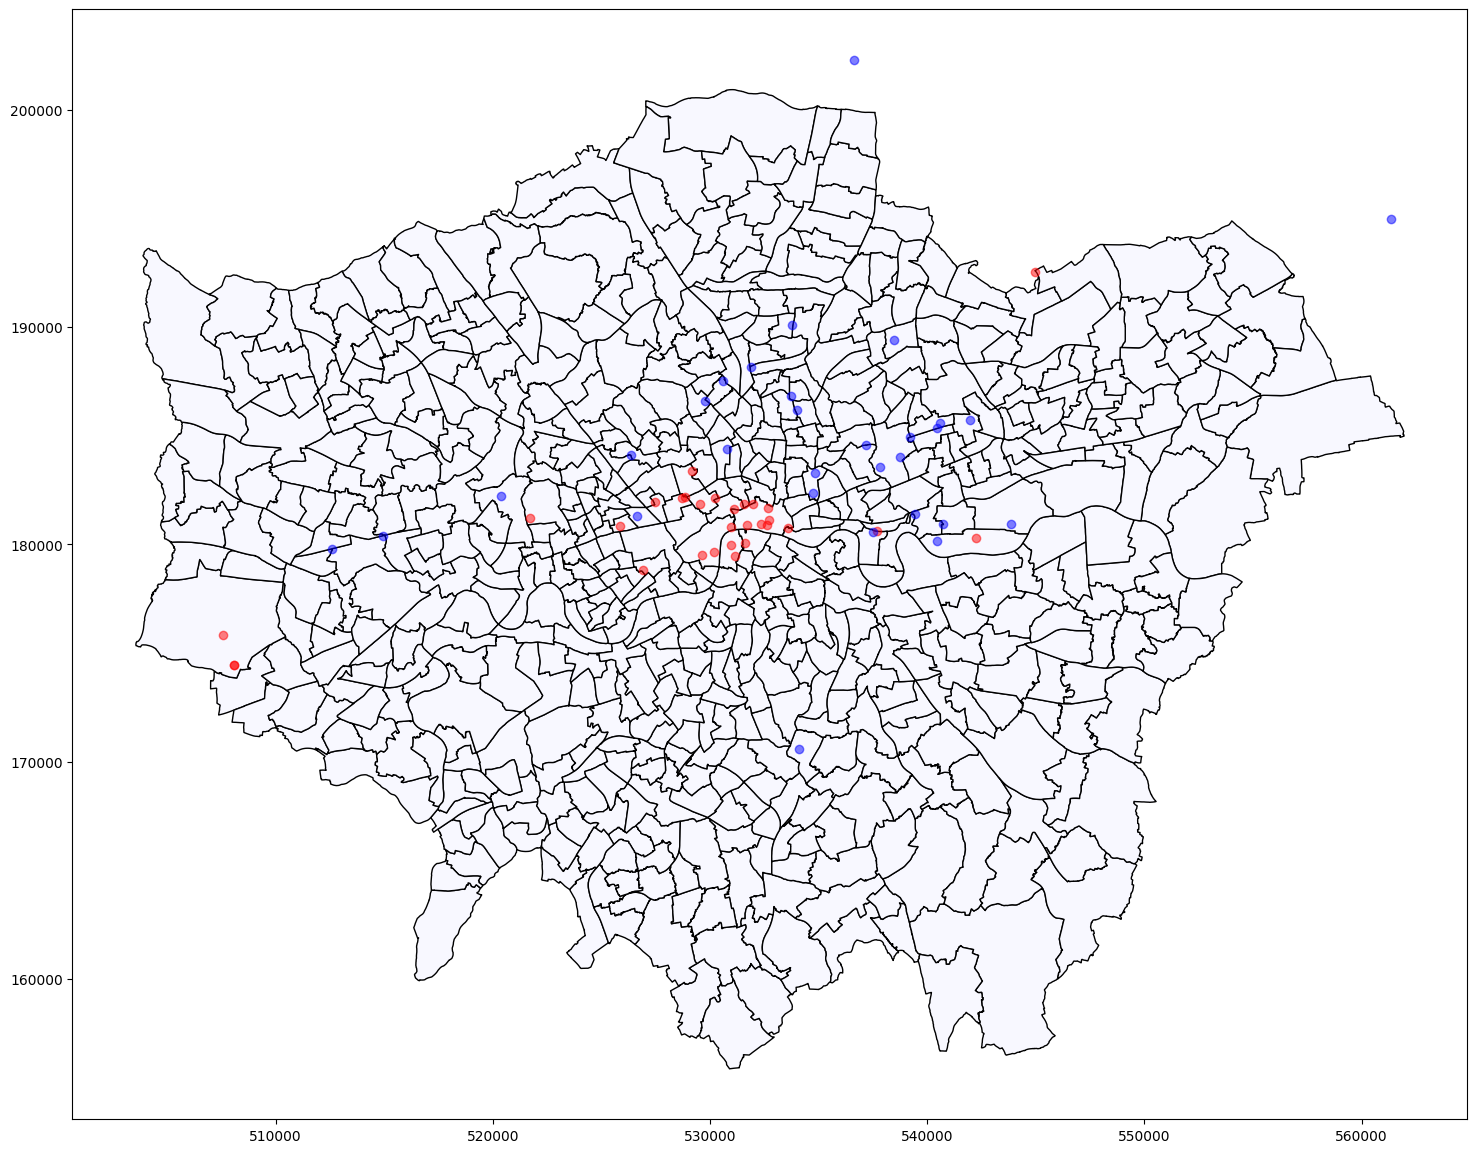

In [201]:
fig, gax = plt.subplots(figsize=(18, 18))
ldn_df.plot(ax=gax, edgecolor="black", color="ghostwhite"); 
gdf_btm30.plot(ax=gax, color='red', alpha = 0.5) # Plotting of the bottom 30 stations by 'Post-Covid impact'
gdf_top30.plot(ax=gax, color='blue', alpha = 0.5) # Plotting of the top 30 stations by 'Post-Covid impact'

In [217]:
# Setting up the link to a Tfl route map I modified to show the individual lines
url = (
    "https://raw.githubusercontent.com/Osakwe1/vis/master/tubecreature/data"
)
tfl_network = f"{url}/tfl_lines.json"
style1 = {'fillColor': '#228B22', 'lineColor': '#228B22'}
style2 = {'fillColor': '#00FFFFFF', 'lineColor': '#00FFFFFF'}
# Setting up map to focus in on London
map = folium.Map(location=[51.55, -0.2], tiles="Stamen Terrain", zoom_start=10)

for i,row in gdf_top30.iterrows():
    # Setup the contents of the popup
    iframe = folium.IFrame(f'{str(row["NAME"])} \n Zone: {str(row["Zone"])} \n Lines: {str(row["LINES"])} \n PCI: {str(row["Post-Covid impact"])}', 
                           width='100px', 
                           height='150px')

    # Initialise the popup using the iframe
    popup = folium.Popup(iframe)
        
    # Add each station to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup, icon=folium.Icon(color='lightblue', icon='')).add_to(map)
    
for i,row in gdf_btm30.iterrows():
    # Setup the contents of the popup
    iframe = folium.IFrame(f'{str(row["NAME"])} Station \n Zone: {str(row["Zone"])} \n Lines: {str(row["LINES"])} \n PCI: {str(row["Post-Covid impact"])}',
                          width='100px',
                          height='150px')
    
    # Initialise the popup using the iframe
    popup = folium.Popup(iframe)
        
    # Add each station to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup, icon=folium.Icon(color='red', icon='')).add_to(map)
    
# Initialise the tfl route map
folium.GeoJson(tfl_network, name="Tube map", style_function=style_function).add_to(map)
# folium.GeoJson(data=ldn_df2["geometry"], name="Inner/Outer London map").add_to(map)

# Create a legend using the tube_lines dictionary
legend_html = """
<div style="position: fixed; 
     bottom: 50px; 
     left: 50px; 
     width: 160px; 
     height: 480px; 
     border: 2px solid grey; 
     z-index:9999; 
     font-size:14px;
     background-color:white;
     ">
     &nbsp; TfL Lines <br>
"""

for line_name, line_info in tube_lines.items():
    legend_html += f"""
     &nbsp; <span style="color:{line_info['colour']}; 
                  font-size: 20px;">&#9679;</span> 
                  {line_name} <br>
    """

legend_html += "</div>"

map.get_root().html.add_child(folium.Element(legend_html))

folium.LayerControl().add_to(map)
     
map

Earlier, we created the upturn and downturn indexes to take a deeper look at recent trends on the TfL network. Now for an even clearer image, we will be plotting the stations in both DFs.

In [203]:
### Creating a Geopandas dataframe of all TfL stations
df_all=pd.merge(df_plot,
                df1,
                on='NLC',   
                how='right').drop(columns=['NETWORK', 'Zone'])
df_all["Coordinates"] = list(zip(df_all.EASTING, df_all.NORTHING))
df_all["Coordinates"] = df_all["Coordinates"].apply(Point)
gdf_all = gpd.GeoDataFrame(df_all, geometry="Coordinates")

# Creating a Geopandas dataframe of the bottom 30 stations by the 'Post-Covid impact' index
df_btm30=pd.merge(df_plot.tail(30),
                  df1,
                  on='NLC',
                  how='left')
df_btm30["Coordinates"] = list(zip(df_btm30.EASTING, df_btm30.NORTHING))
df_btm30["Coordinates"] = df_btm30["Coordinates"].apply(Point)
gdf_btm30 = gpd.GeoDataFrame(df_btm30, geometry="Coordinates")

# Creating a Geopandas dataframe of the top 30 stations by the 'Post-Covid impact' index
df_top30=pd.merge(df_plot.head(30),
                  df1, 
                  on='NLC',
                  how='left').drop(columns=['NETWORK'])
df_top30["Coordinates"] = list(zip(df_top30.EASTING, df_top30.NORTHING))
df_top30["Coordinates"] = df_top30["Coordinates"].apply(Point)
gdf_top30 = gpd.GeoDataFrame(df_top30, geometry="Coordinates")

##### First, I created a simple geoplot using shapefiles

<AxesSubplot:>

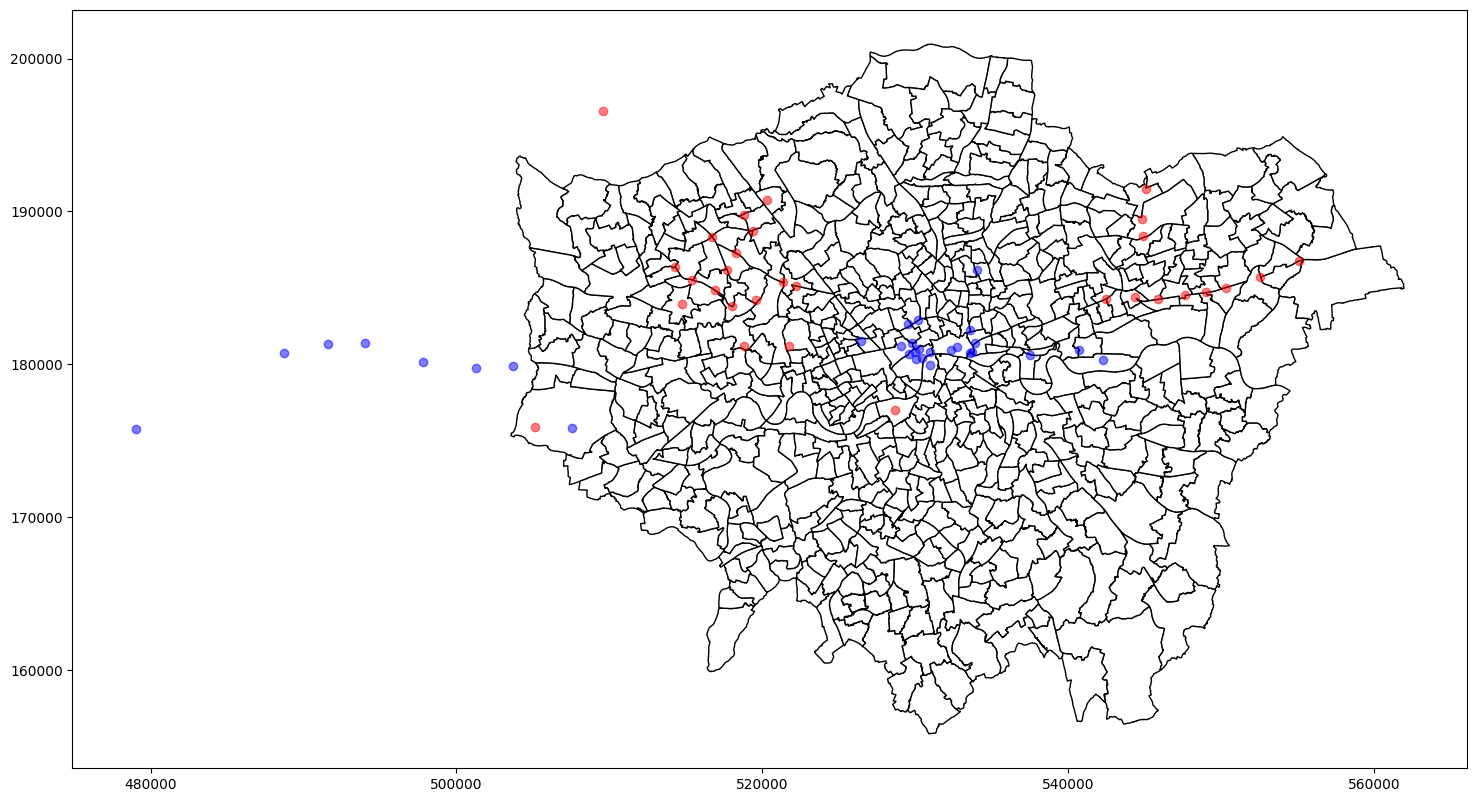

In [204]:
# A plot of the all TfL stations
fig, gax = plt.subplots(figsize=(18, 18))
ldn_df.plot(ax=gax, edgecolor="black", color="white")
gdf_downturn.plot(ax=gax, color='red', alpha = 0.5)
gdf_upturn.plot(ax=gax, color='blue', alpha = 0.5)

##### However, for an interactive and more informative map, I created this plot using Folium and json:

In [205]:
df_plot=df_merged.sort_values('Post-Covid impact', ascending=False).dropna(thresh=5)
df_plot['Post-Covid impact']=df_plot['Post-Covid impact'].round(3)
print(df_plot.shape)
df_plot.tail()

(416, 18)


NLC                 Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
184   695.0        St. James's Park  13084320.0  13189508.0  13424654.0   
33    536.0        Cannon Street LU   4109347.0   4540496.0   3932511.0   
291   858.0                  Poplar         NaN         NaN         NaN   
266   781.0  Heathrow Terminal 4 LU   2110256.0   1173324.0   1767759.0   
422  7091.0  Heathrow Terminal 4 EL         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
184  13300266.0  13496515.0  14261759.0  14726104.0  15730145.0  15698186.0   
33    3947306.0   4047494.0   4088480.0   4644524.0   5299813.0   7485065.0   
291         NaN         NaN         NaN         NaN         NaN         NaN   
266   2142085.0   2459358.0   2436725.0   2427793.0   7655649.0   2347501.0   
422         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
184  14934536.0  13664987.0  14169247.0  14479978.0   2919119.0   3901970.0   
33    8983249.0   8996282.0   7399745.0   7108243.0   1559861.0   2147772.0   
291         NaN   4713917.0   4567851.0   4967283.0   1135902.0    825604.0   
266   2278746.0   2146778.0   2127743.0   2125220.0         0.0         0.0   
422         NaN         NaN   1420311.0   1426266.0         0.0         0.0   

     Post-Covid impact  
184              0.277  
33               0.274  
291              0.174  
266              0.000  
422              0.000

In [206]:
url = (
    "https://raw.githubusercontent.com/Osakwe1/vis/master/tubecreature/data"
)
tfl_network = f"{url}/tfl_lines.json"

map = folium.Map(location=[51.55, -0.25], 
                 tiles="Stamen Terrain", 
                 zoom_start=10)
# folium.GeoJson(data=ldn_df["geometry"]).add_to(map)

for i,row in gdf_downturn.iterrows():
    #Setup the content of the popup

    iframe = folium.IFrame(f'{str(row["NAME"])} \n Zone: {str(row["Zone"])} \n Lines: {str(row["LINES"])} \n Downturn: {str(row["Downturn"])}', 
                           width='100px', 
                           height='150px')

    #Initialise the popup using the iframe
    popup = folium.Popup(iframe)
        
    #Add each row to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup, icon=folium.Icon(color='red', icon='')).add_to(map)
    
for i,row in gdf_upturn.iterrows():
    #Setup the content of the popup
    iframe = folium.IFrame(f'{str(row["NAME"])} Station \n Zone: {str(row["Zone"])} \n Lines: {str(row["LINES"])} \n Upturn: {str(row["Upturn"])}',
                          width='100px',
                          height='150px')
    
    #Initialise the popup using the iframe
    popup = folium.Popup(iframe)
        
    #Add each row to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup, icon=folium.Icon(color='blue', icon='')).add_to(map)
    
folium.GeoJson(tfl_network, name="Tube map", style_function=style_function).add_to(map)
folium.LayerControl().add_to(map)
     
map

In [207]:
print(gdf_top30[gdf_top30['London Underground'] == 'Yes'].shape[0])
print(gdf_top30[gdf_top30['London Overground'] == 'Yes'].shape[0])
print(gdf_top30[gdf_top30['DLR'] == 'Yes'].shape[0])
print(gdf_top30[gdf_top30['Elizabeth Line'] == 'Yes'].shape[0])
print(" ")
print(gdf_btm30[gdf_btm30['London Underground'] == 'Yes'].shape[0])
print(gdf_btm30[gdf_btm30['London Overground'] == 'Yes'].shape[0])
print(gdf_btm30[gdf_btm30['DLR'] == 'Yes'].shape[0])
print(gdf_btm30[gdf_btm30['Elizabeth Line'] == 'Yes'].shape[0])

1
15
7
8
 
26
0
3
2


In [208]:
df1

NLC                         NAME  EASTING  NORTHING  \
0     750                   Abbey Road   539077    183399   
1    5131                   Abbey Wood   547297    179002   
2    1404                Acton Central   520296    181196   
3    3000              Acton Main Line   520357    182233   
4     500                   Acton Town   519478    179592   
7     502                      Aldgate   533613    181262   
8     503                 Aldgate East   533936    181375   
9     850                   All Saints   537979    180993   
10    505                     Alperton   517996    183795   
11    506                     Amersham   496372    198181   
13   5397                      Anerley   534617    169899   
14    507                        Angel   531561    183100   
15    508                      Archway   529364    186721   
17    509                  Arnos Grove   529355    192498   
18    510                      Arsenal   531305    186112   
20    511                 Baker Street   527955    182064   
21    512                    Balham LU   528480    173244   
22    513            Bank and Monument   532710    181120   
23    501                     Barbican   532004    181856   
24    514                      Barking   544359    184382   
25   1335            Barking Riverside   546824    182141   
26    515                  Barkingside   544799    189494   
27    516                 Barons Court   524046    178328   
28   5420               Battersea Park   528703    176999   
29    832      Battersea Power Station   529122    177252   
30    517                    Bayswater   525843    180823   
33    895                      Beckton   543165    181514   
34    891                 Beckton Park   542705    180873   
35    518                    Becontree   547628    184527   
38    519                 Belsize Park   527354    185089   
39    787                   Bermondsey   534460    179416   
40   6961             Bethnal Green LO   534721    182351   
41    520             Bethnal Green LU   535044    182718   
43    521               Blackfriars LU   531694    180893   
45    522              Blackhorse Road   535761    189370   
46    882                    Blackwall   538398    180664   
47    524                  Bond Street   528491    181118   
48    525                      Borough   532440    179751   
49    526                 Boston Manor   516334    178693   
50    527                 Bounds Green   529984    191469   
51    851                   Bow Church   537393    182829   
52    528                     Bow Road   537090    182736   
53    529                  Brent Cross   523874    187934   
54   6872                    Brentwood   559339    193033   
55    778                   Brixton LU   531052    175429   
56   5404                     Brockley   536431    175789   
57    530               Bromley-by-Bow   538050    182524   
58   1437                  Brondesbury   524760    184467   
59   1438             Brondesbury Park   524227    183953   
60   6958                  Bruce Grove   533800    190100   
61    531               Buckhurst Hill   541778    193891   
62   3176                      Burnham   494007    181378   
63    532                    Burnt Oak   520326    190760   
64   6913               Bush Hill Park   533690    195389   
65   1395                       Bushey   511823    195237   
66    534              Caledonian Road   530558    184970   
67   1439  Caledonian Road & Barnsbury   530765    184374   
68   6962              Cambridge Heath   534856    183270   
69   1440                  Camden Road   529171    184178   
70    535                  Camden Town   528910    183894   
71    788                 Canada Water   535475    179472   
72    842             Canary Wharf DLR   537450    180322   
73   6560              Canary Wharf EL   537650    180451   
74    852              Canary Wharf LU   537677    180140   
75    884                 Canning Town   

### Observations 🔎

Looking at the bottom 30 stations by Post-Covid Index, we spot a few trends:
- 21 of the 30 stations selected (70%) are within the Zone 1 fare
- Only 4 of the 30 stations selected are outside of Inner London (Heathrow T4 EL, Heathrow T123 LU, Grange Hill & Roding Valley.)
- All Airport terminals (Heathrow T4 EL, Heathrow T123 LU, ) are included in the bottom 30.

For comparison, looking at the top 30 stations by Post-Covid Index:
- Only 1 of the 30 stations selected are within the Zone 1 fare zone, the Paddington NR station which has the newly finished Elizabeth line central section.
- 7 of the 

In [209]:
print(gdf_btm30['Zone'].shape[0])
print(gdf_btm30[gdf_btm30['Zone'] == '1'].shape[0])
print(gdf_btm30[gdf_btm30['Zone'] == '2'].shape[0])
print(" ")
print(gdf_top30[gdf_top30['Zone'] == '1'].shape[0])
print(gdf_top30[gdf_top30['Zone'] == '2'].shape[0])

30
22
3
 
1
9


In [210]:
print(gdf_top30[gdf_top30['London Underground'] == 'Yes'].shape[0])
print(gdf_top30[gdf_top30['London Overground'] == 'Yes'].shape[0])
print(gdf_top30[gdf_top30['DLR'] == 'Yes'].shape[0])
print(gdf_top30[gdf_top30['Elizabeth Line'] == 'Yes'].shape[0])
print(" ")
print(gdf_btm30[gdf_btm30['London Underground'] == 'Yes'].shape[0])
print(gdf_btm30[gdf_btm30['London Overground'] == 'Yes'].shape[0])
print(gdf_btm30[gdf_btm30['DLR'] == 'Yes'].shape[0])
print(gdf_btm30[gdf_btm30['Elizabeth Line'] == 'Yes'].shape[0])

1
15
7
8
 
26
0
3
2



If you're interested in looking even more detailed maps and data on the TfL network, you can check out [Tubecreature](https://tubecreature.com/) by University College London professor, Oliver O'Brien. 


Thank you for your interest in this project! Check out what I'm working on next on [GitHub](https://github.com/Osakwe1)